In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, IntSlider

In a Freedericksz transition, the critical field H_C needed for a transition is $$ H_c = \frac{\pi}{d}\sqrt{\frac{K}{ \mu_{0} \nabla \chi}}$$

In [2]:
def director_qmin_color(string, dimx, dimy, dimz):
    data = np.loadtxt(string, delimiter='	', converters=None, skiprows=0, usecols = (3,4,5,6,7))
    Qxx = data[:,0]
    Qxy = data[:,1]
    Qxz = data[:,2]
    Qyy = data[:,3]
    Qyz = data[:,4]
    Qmat = np.moveaxis(np.array([
                [Qxx, Qxy, Qxz],
                [Qxy, Qyy, Qyz],
                [Qxz, Qyz, -Qxx-Qyy]
                ]), -1, 0)
    evals, evecs = np.linalg.eigh(Qmat)
    n = (evecs[:,:,2])
    
    nx = n[:,0]
    ny = n[:,1]
    nz = n[:,2]
    
    
    color_ny_nx = np.absolute(np.arctan(ny/nx))
    color_nz_ny = np.absolute(np.arctan(nz/ny))

    color_ny_nx = np.reshape(color_ny_nx, (dimx,dimy,dimz), order='F')
    color_nz_ny = np.reshape(color_nz_ny, (dimx,dimy,dimz), order='F')
    nx = np.reshape(nx, (dimx,dimy,dimz), order='F')
    ny = np.reshape(ny, (dimx,dimy,dimz), order='F')
    nz = np.reshape(nz, (dimx,dimy,dimz), order='F')
    return(nx,ny,nz,color_ny_nx,color_nz_ny)

In [3]:
def remove_ticks_and_labels(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [4]:
dimx = 240
dimy = 240
dimz = 28

l = 40
w = 40
h = 20

mid_x = mid_y = 120
mid_z = 14

In [12]:
st = 'data_open_Qmin/f_trans/f_trans_240_240_28_H_'
st_end = '_x0y0z0.txt'

# Define file paths for data
file_paths = [f"{st}{i}{st_end}" for i in range(0, 410, 10)]

# List of file paths
g_list = [f"g{i}" for i in range(30)]

# Apply director_qmin_color to each file path
H_results = [director_qmin_color(globals()[g], dimx, dimy, dimz) for g in g_list]

# Unpack the results
H_nx_list, H_ny_list, H_nz_list, H_c_ny_nx_list, H_c_nz_ny_list = zip(*H_results)

/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_23132/2280039487.py:21: RuntimeWarning: divide by zero encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_23132/2280039487.py:21: RuntimeWarning: invalid value encountered in divide
  color_ny_nx = np.absolute(np.arctan(ny/nx))
/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_23132/2280039487.py:22: RuntimeWarning: divide by zero encountered in divide
  color_nz_ny = np.absolute(np.arctan(nz/ny))


In [17]:
H_values = [
    0, 120, 130, 140, 150, 160, 170, 180, 190, 200,
    210, 220, 230, 240, 250, 260, 270, 280, 290, 300,
    310, 320, 330, 340, 350, 360, 370, 380, 390, 400
]

ND_values = [0,
    44395662.0, 48095301.0, 51794939.0, 51794939.0, 55494578.0, 59194216.0, 
    62893855.0, 66593493.0, 70293132.0, 73992770.0, 77692408.0, 81392047.0, 
    85091685.0, 88791324.0, 92490962.0, 96190601.0, 99890239.0, 103589878.0, 
    107289516.0, 110989155.0, 114688793.0, 118388432.0, 122088070.0, 125787709.0, 
    129487347.0, 133186986.0, 136886624.0, 140586263.0, 144285901.0, 147985540.0, 
    151685178.0
]

# Create the H_list
H_list = [
    (H_ny_list[i], H_nz_list[i], H_c_nz_ny_list[i], f'H = {H_values[i]} ND = {ND_values[i]} A/m')
    for i in range(30)
]

In [18]:
k_z = 4
scale = 80
width = .003
headaxislength = 0
headlength = 0
headwidth = 0

/var/folders/km/6100r2s95qv9p3rv2w71v8tr0000gn/T/ipykernel_23132/1861142049.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(64,64))


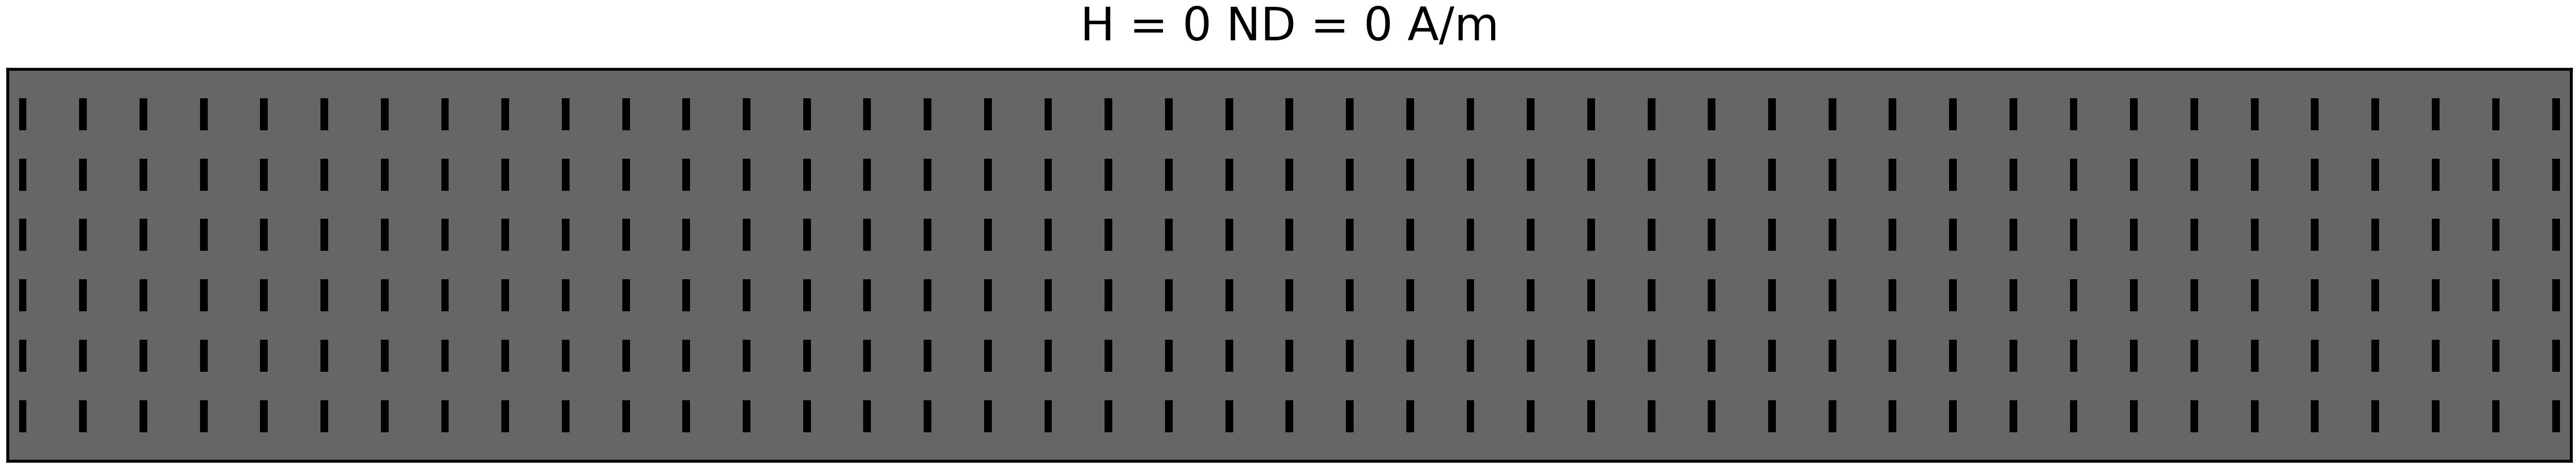

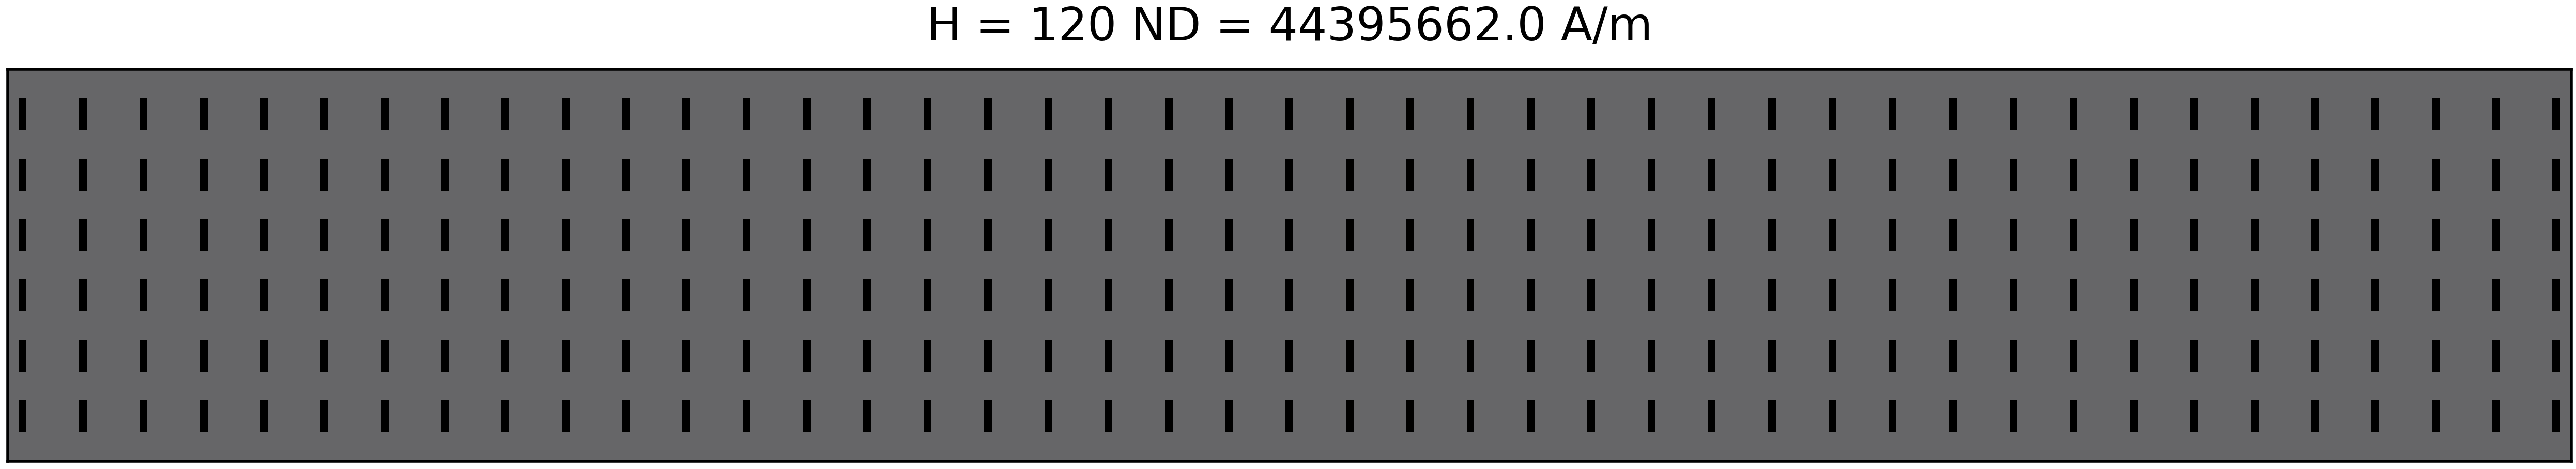

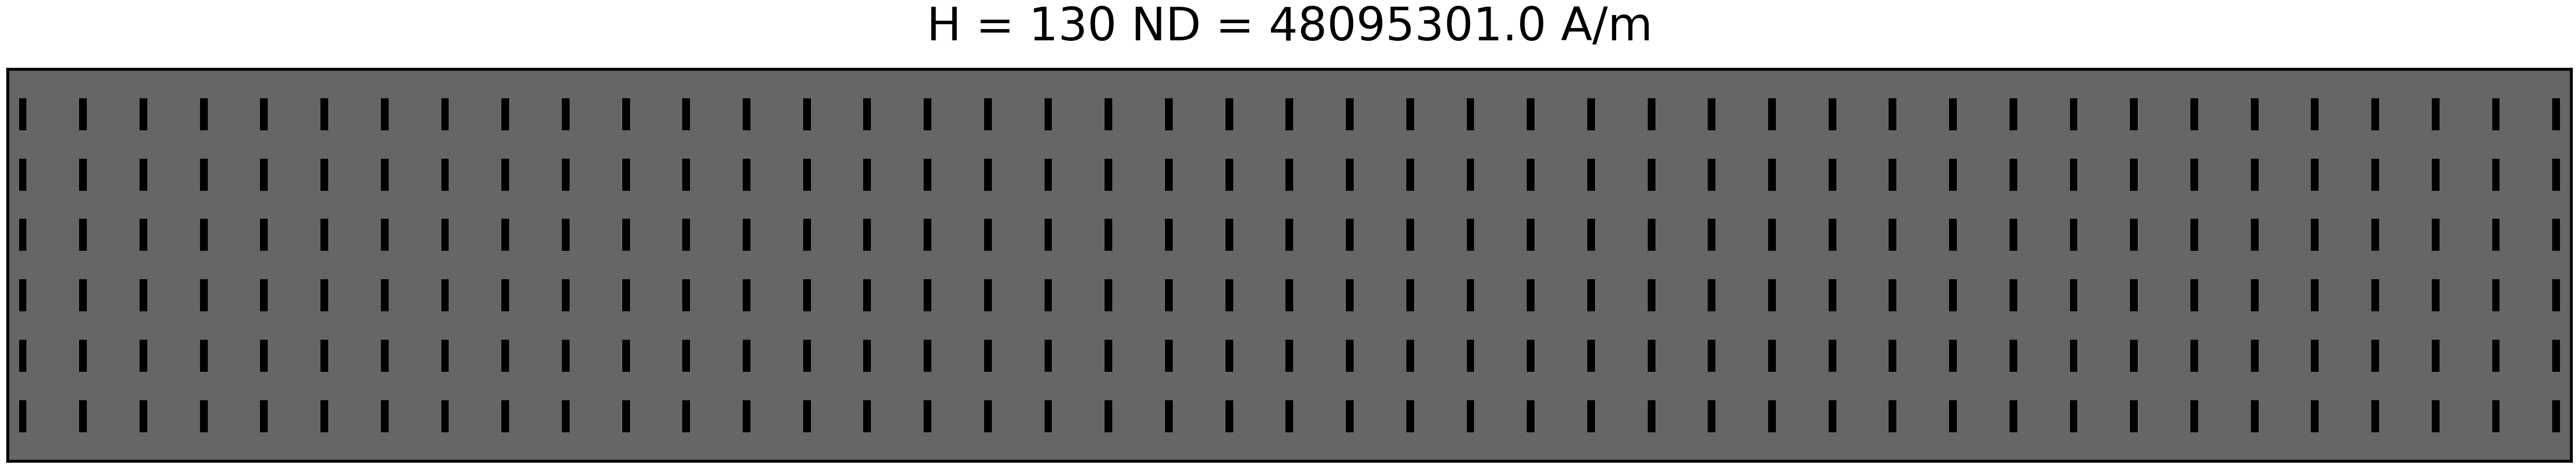

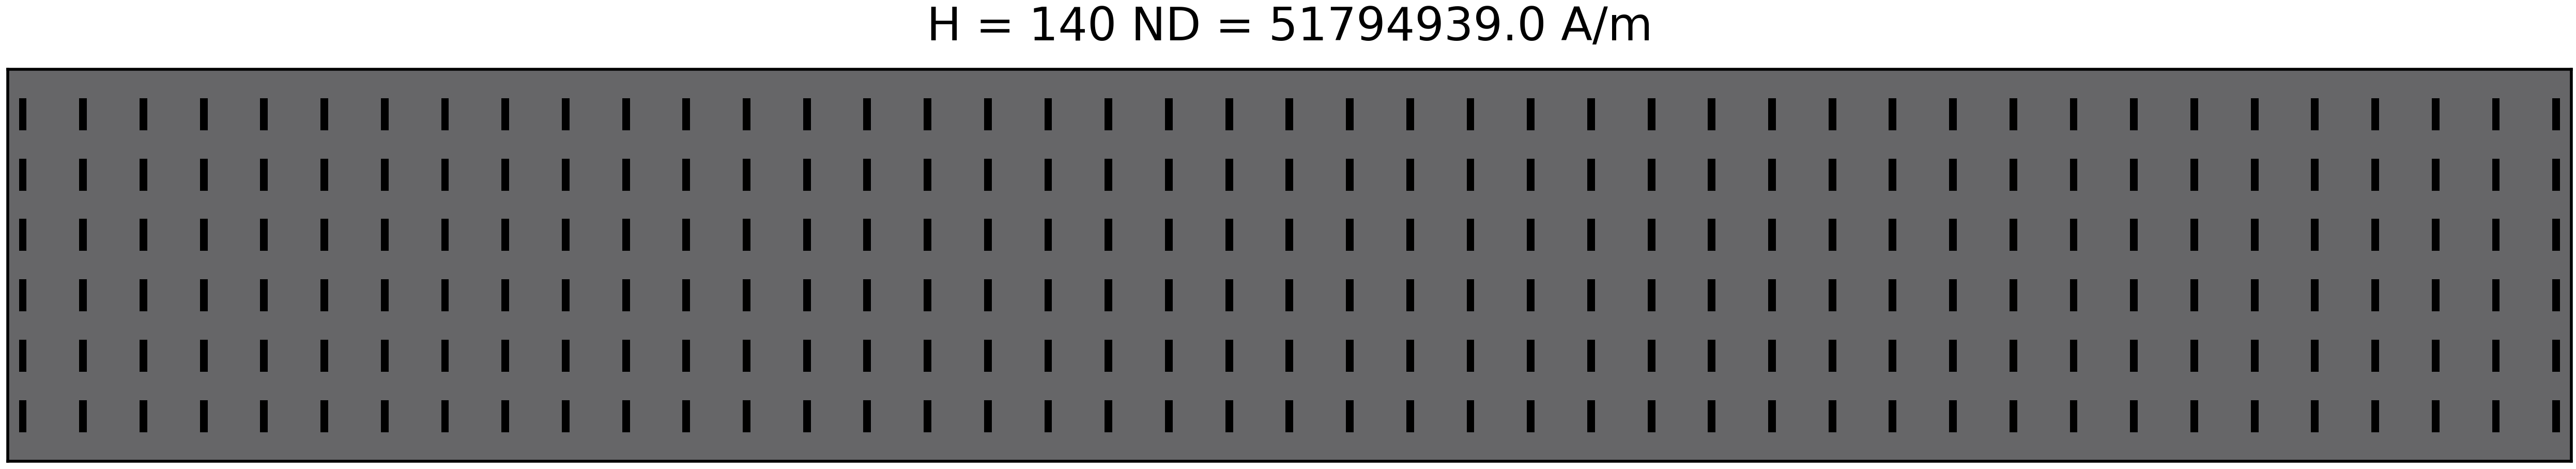

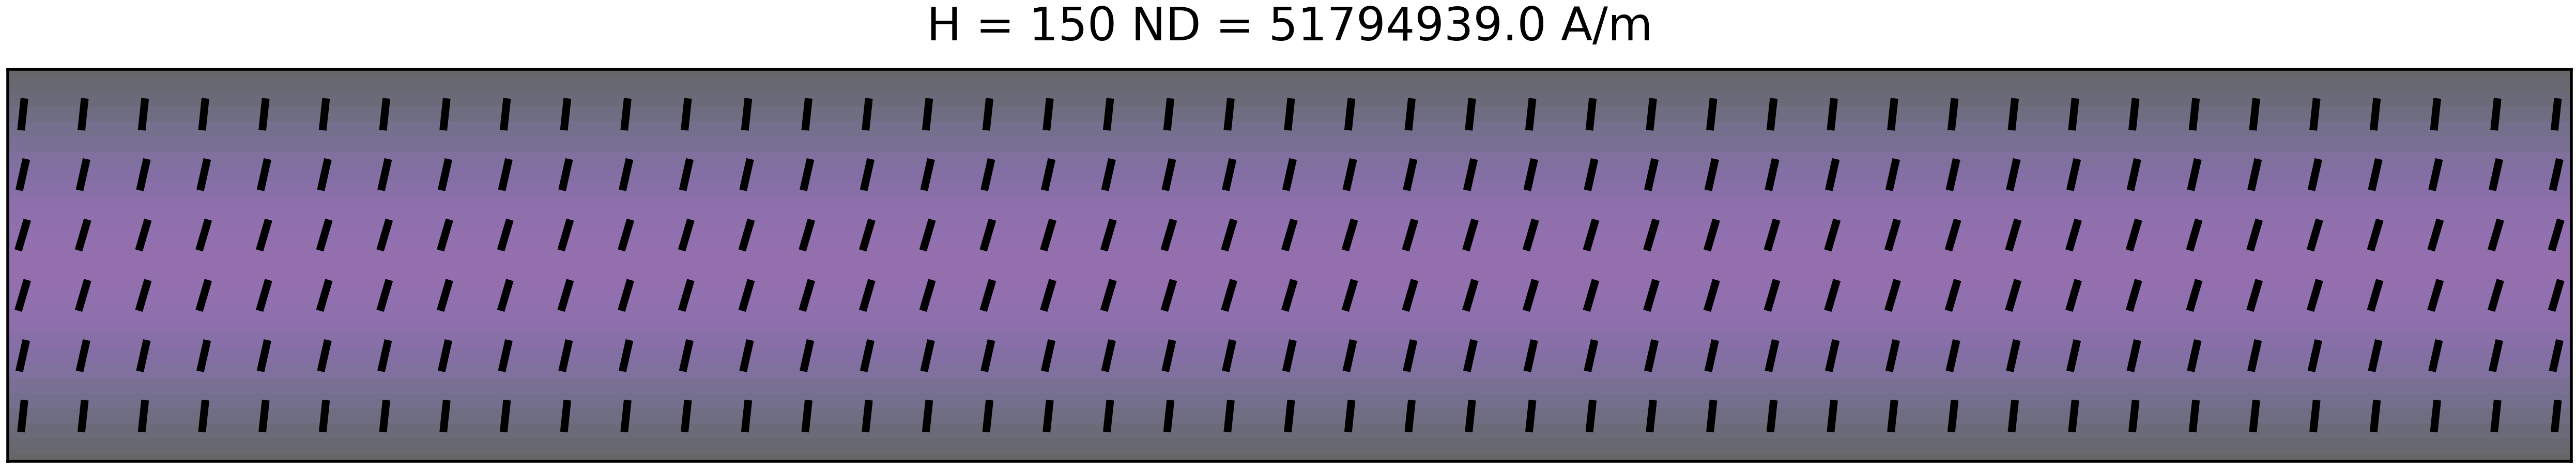

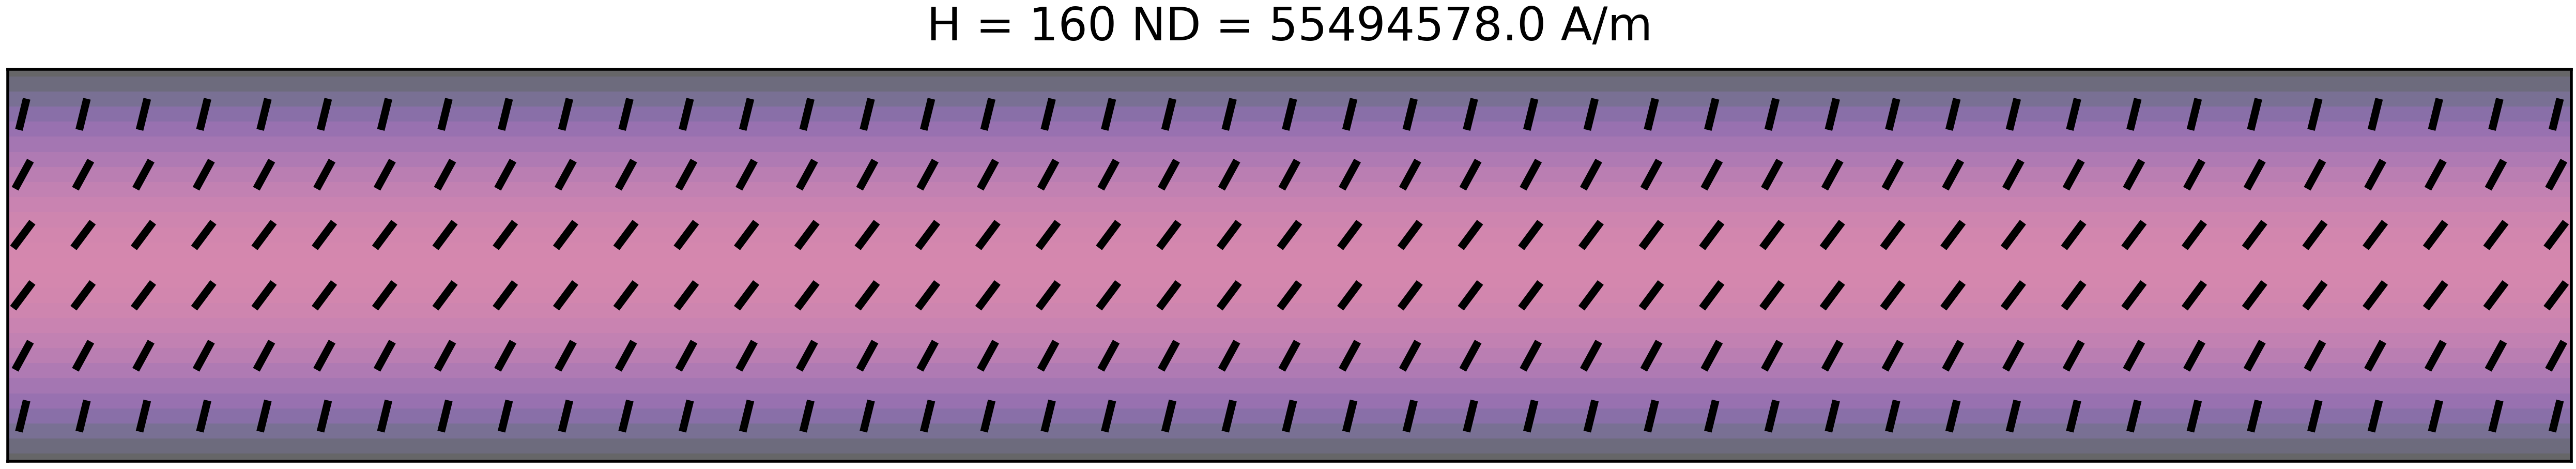

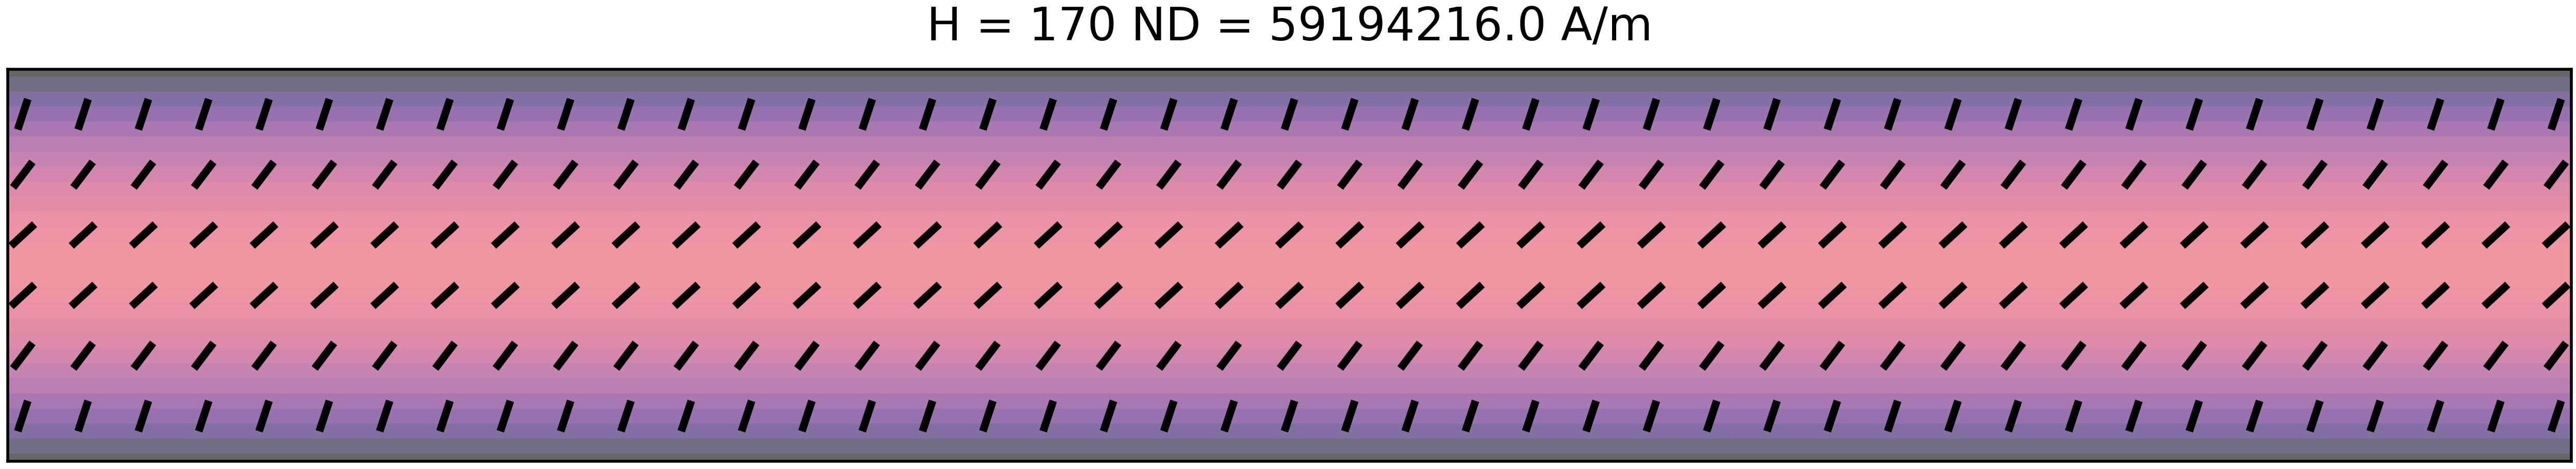

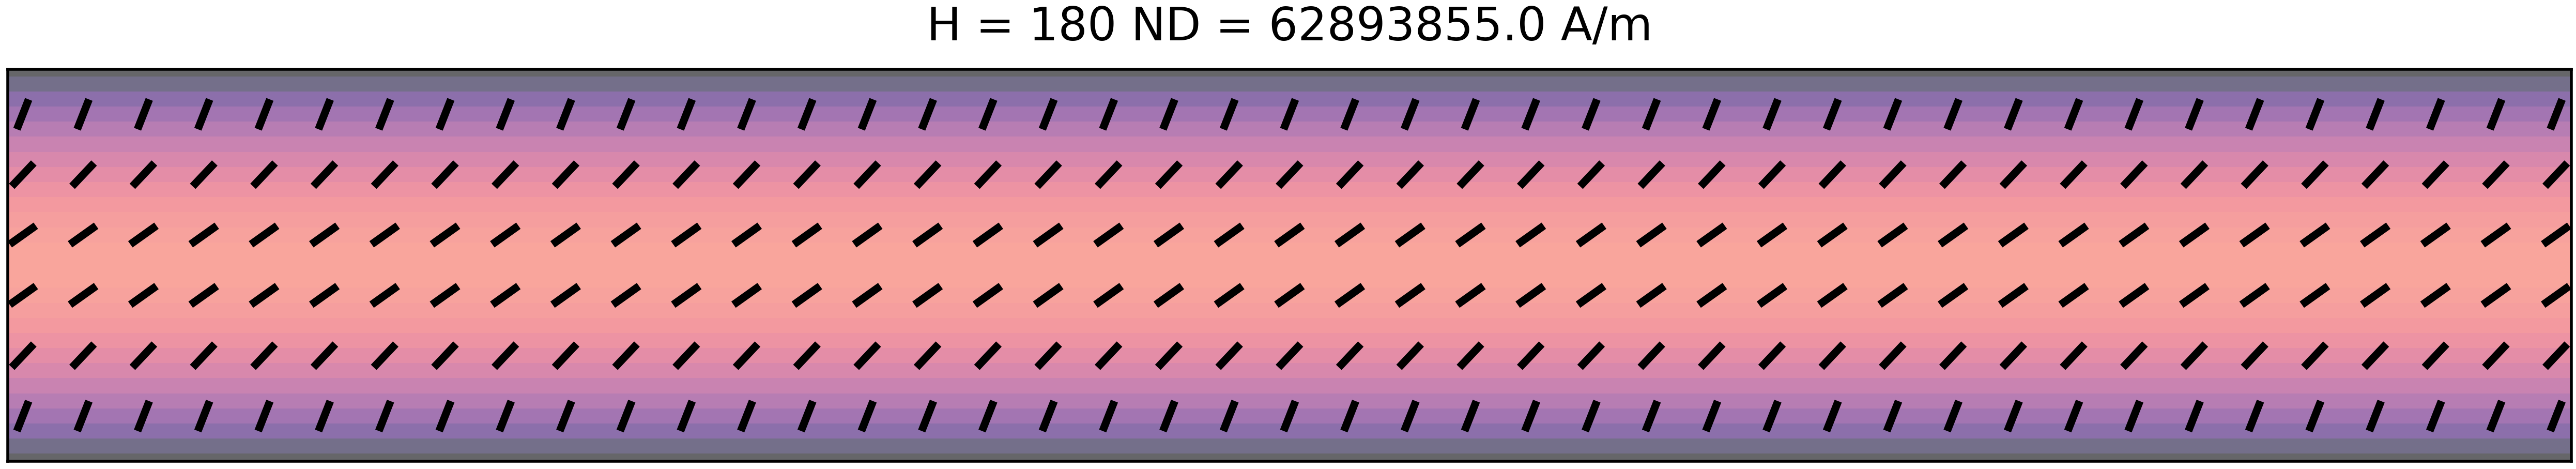

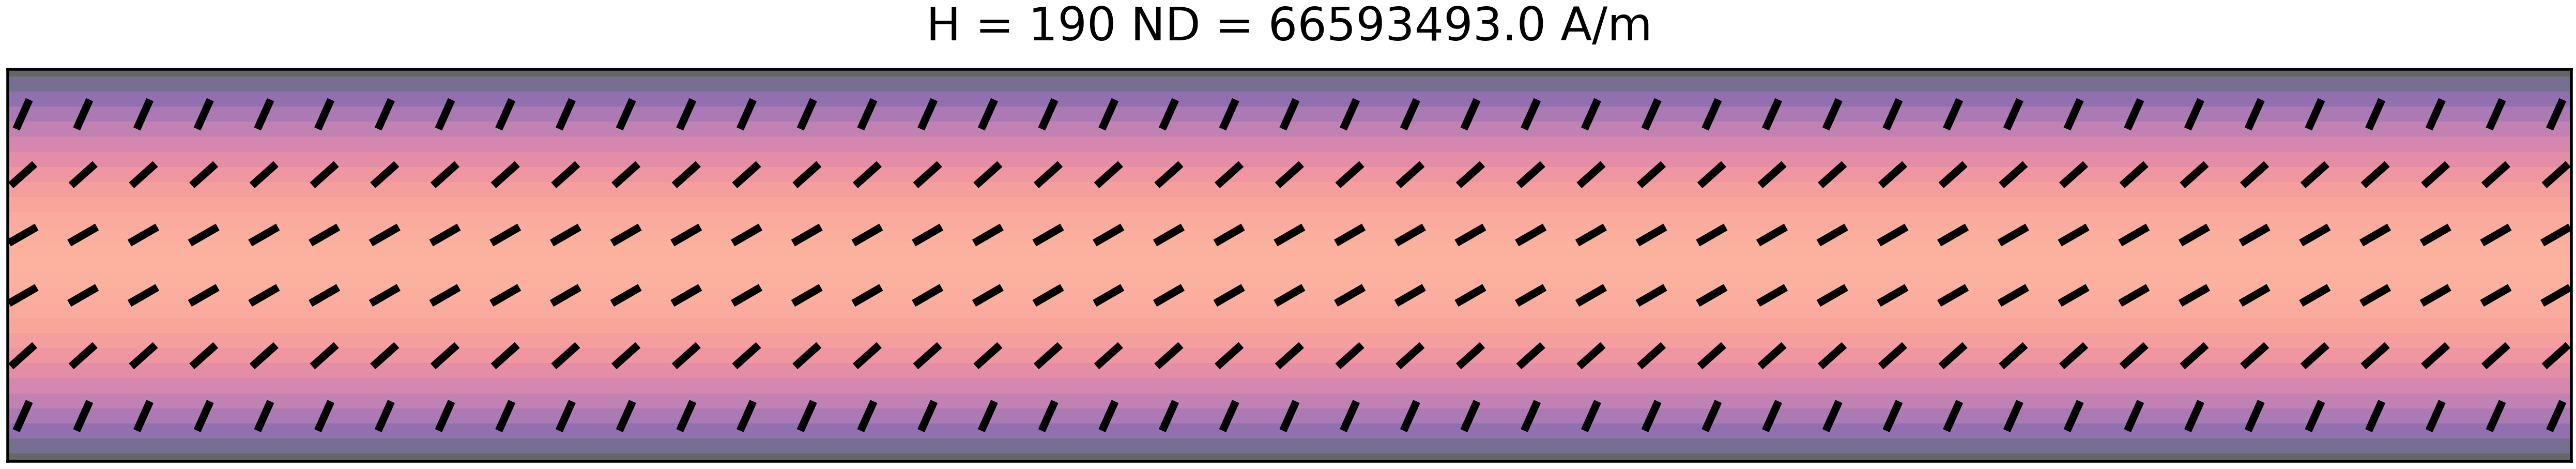

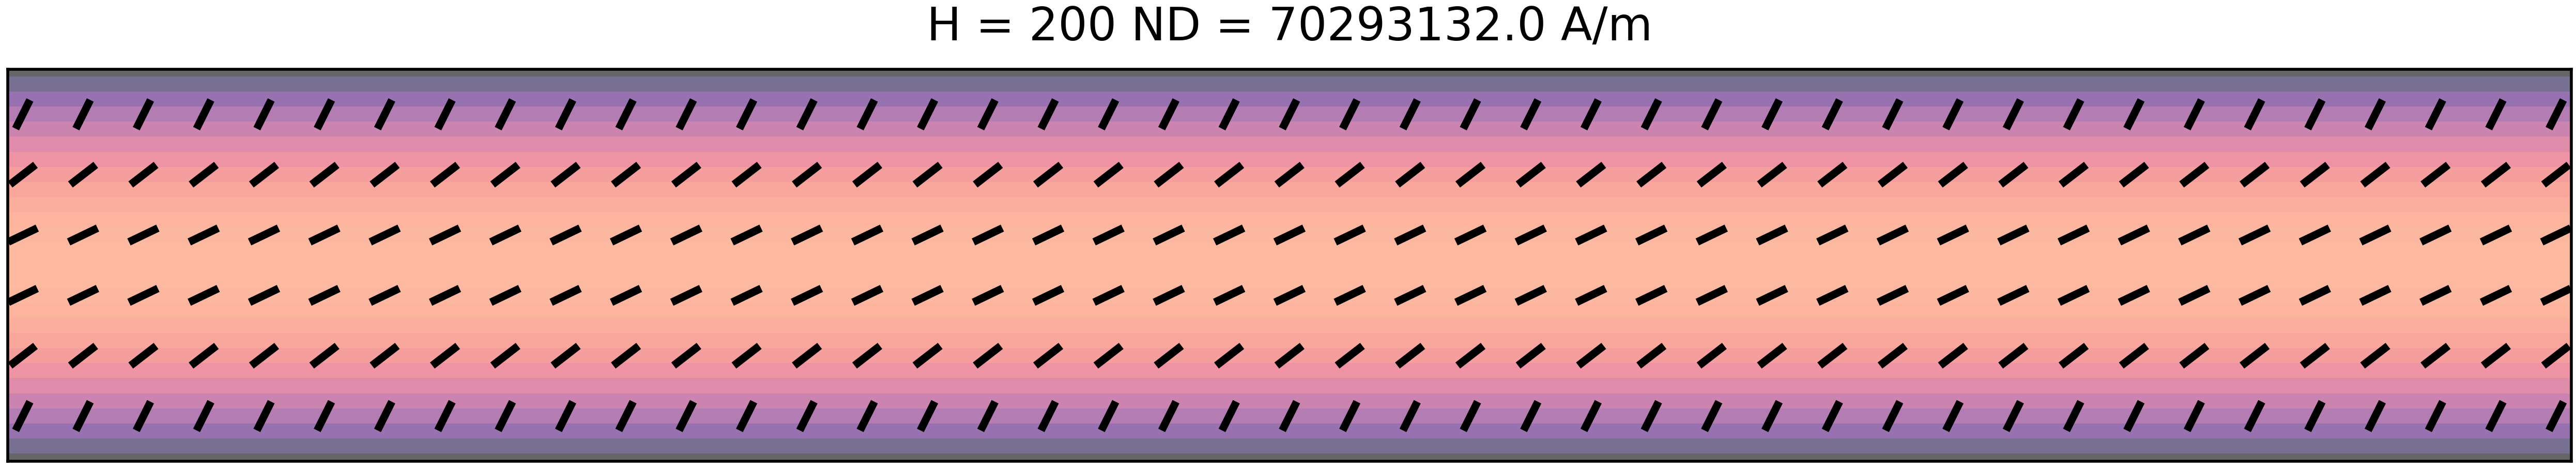

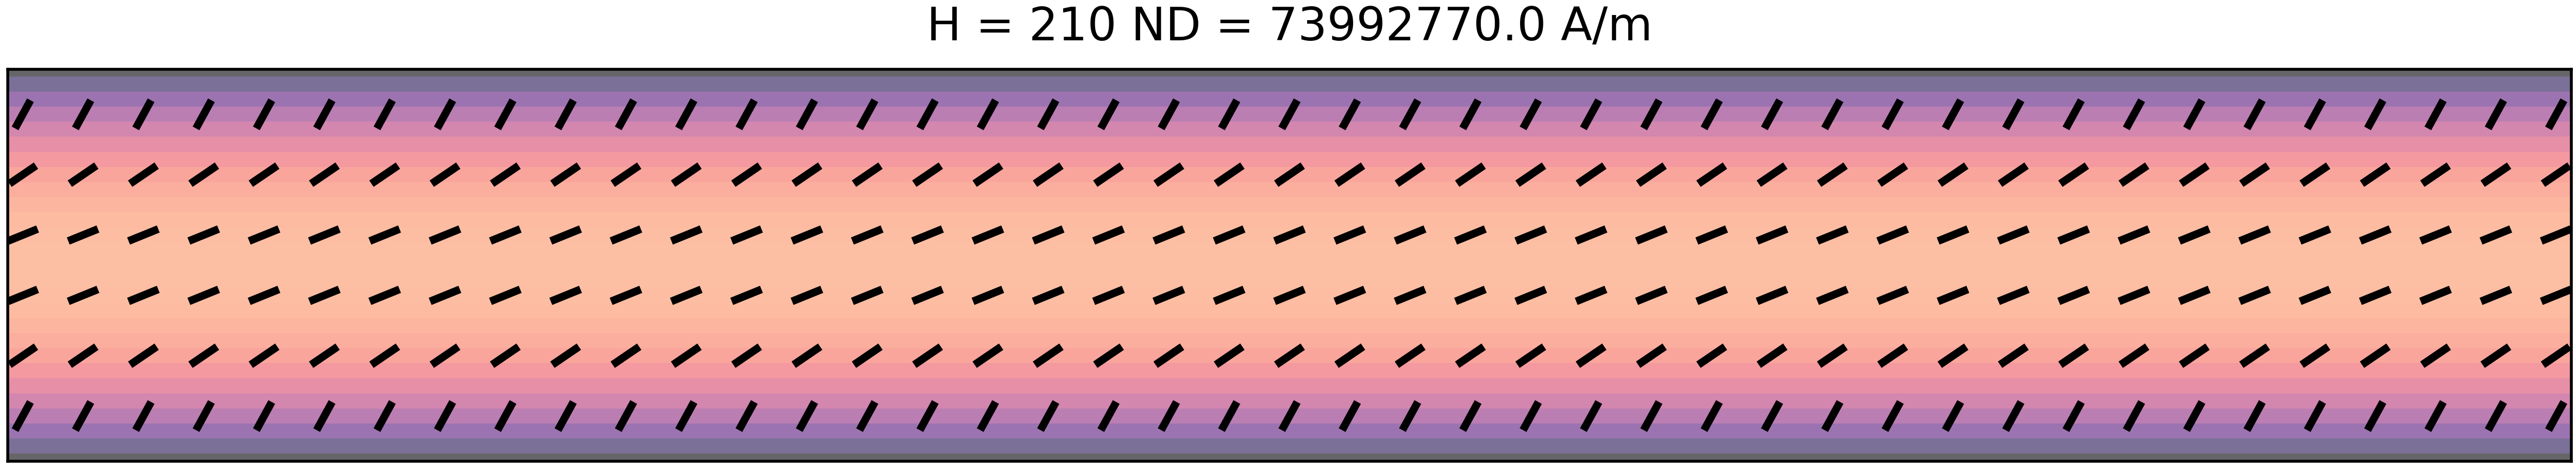

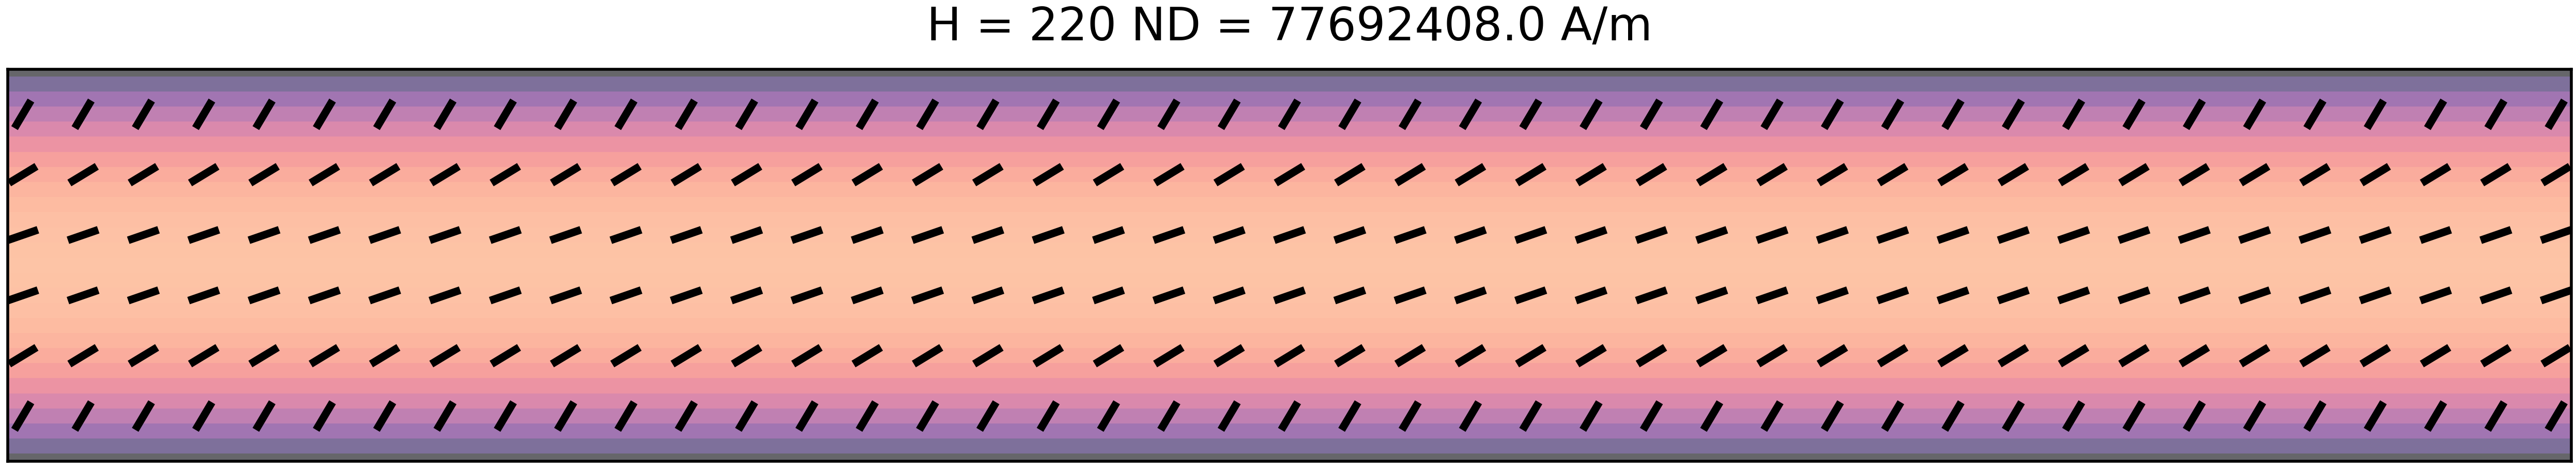

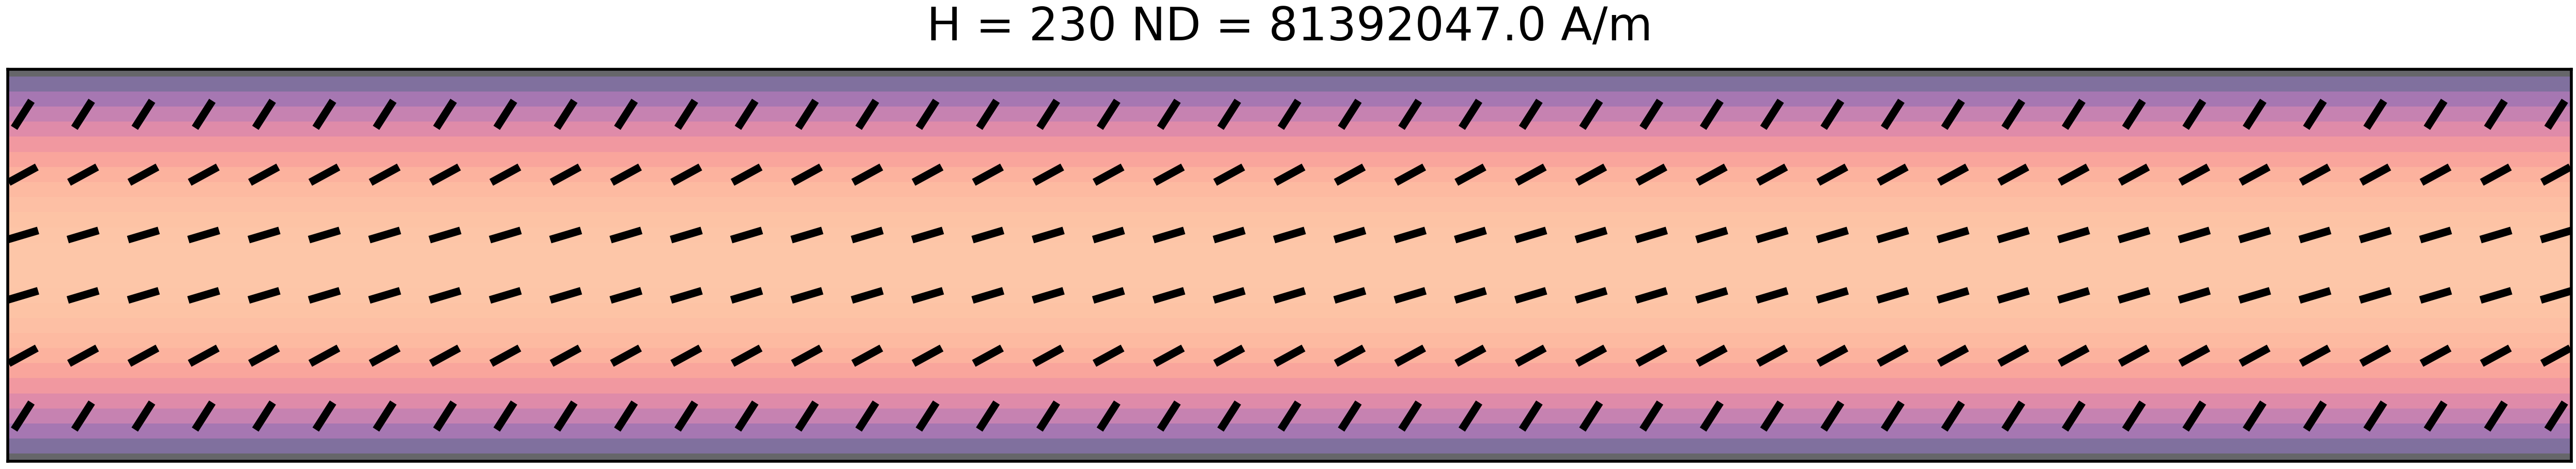

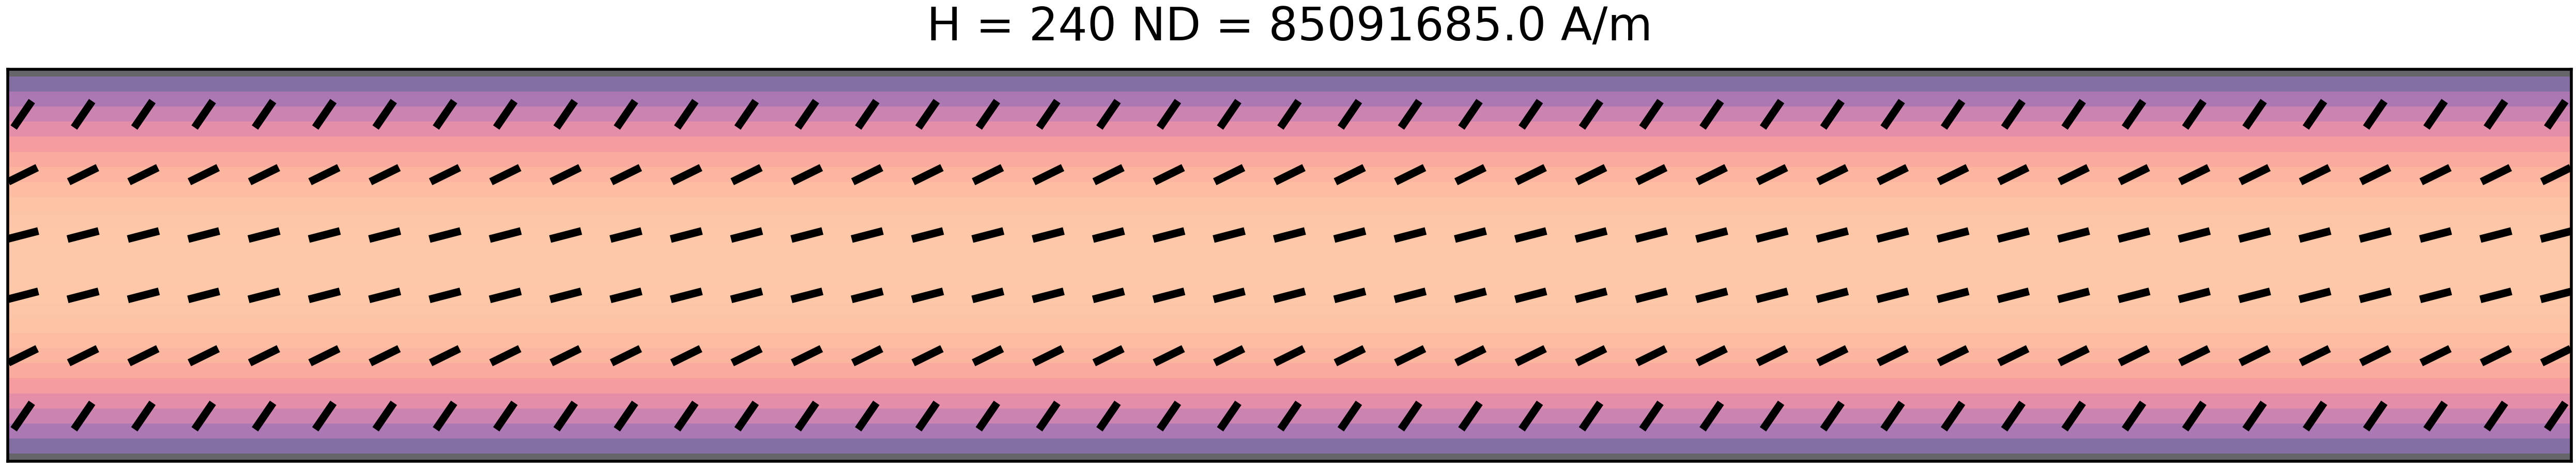

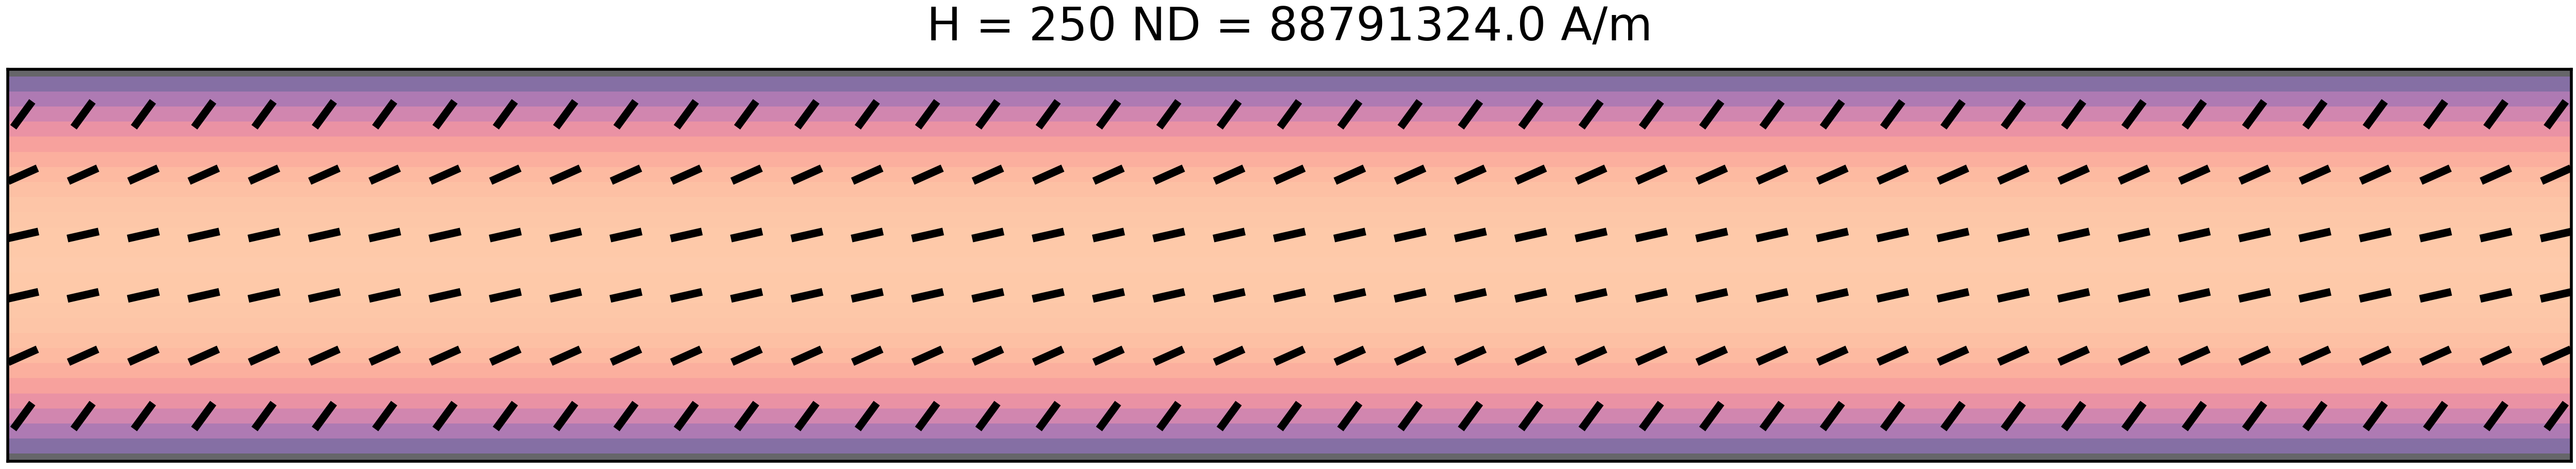

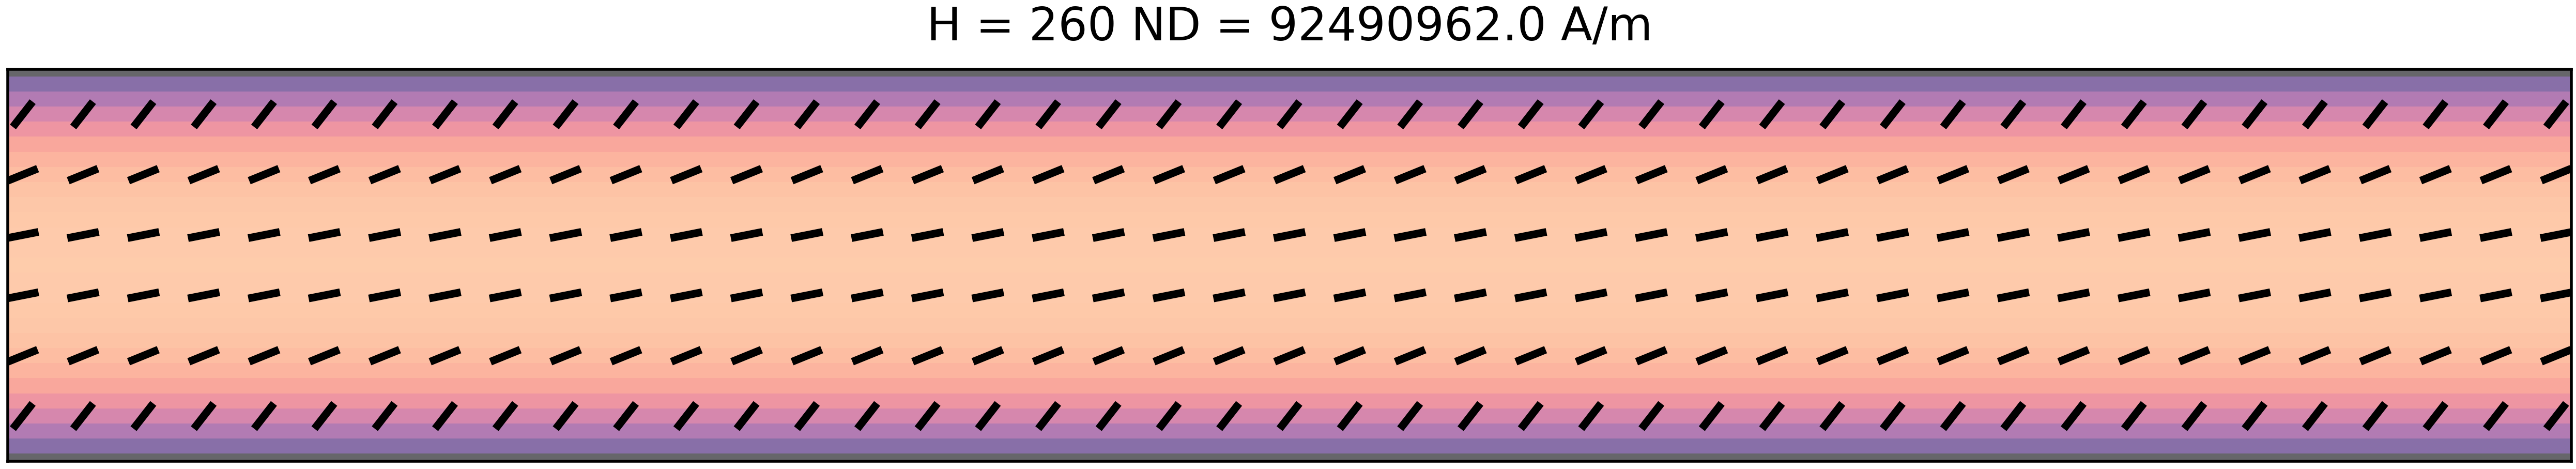

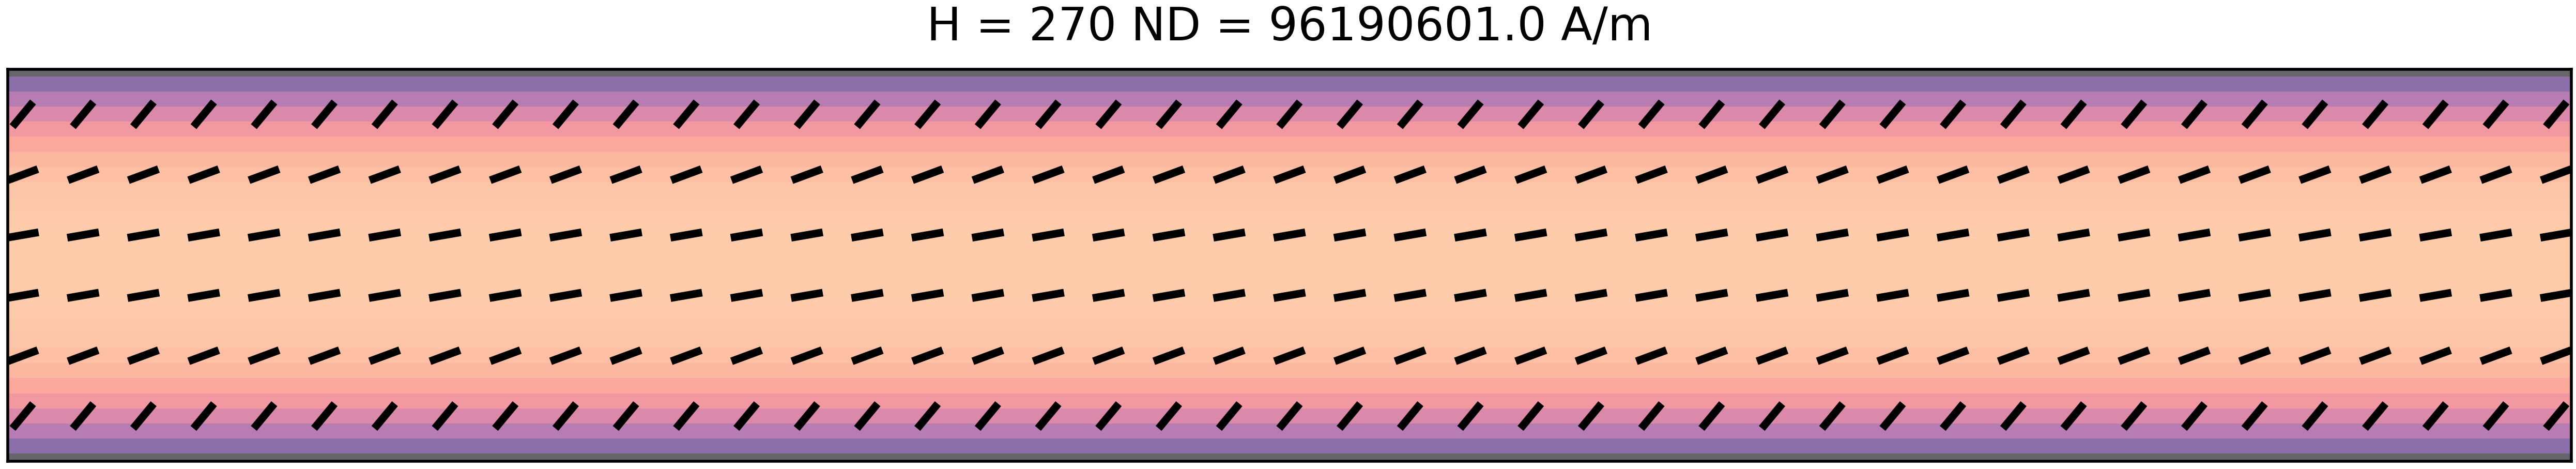

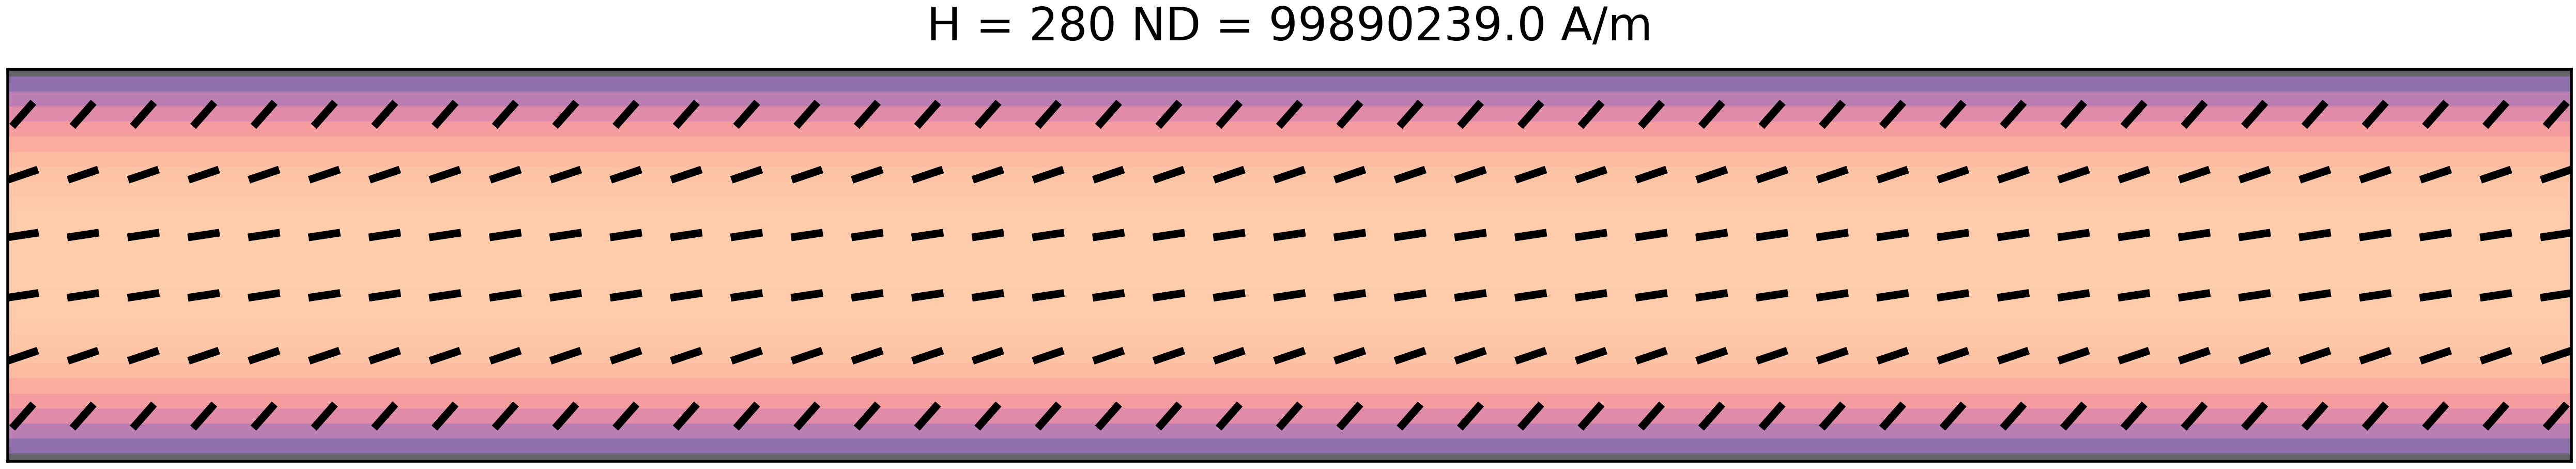

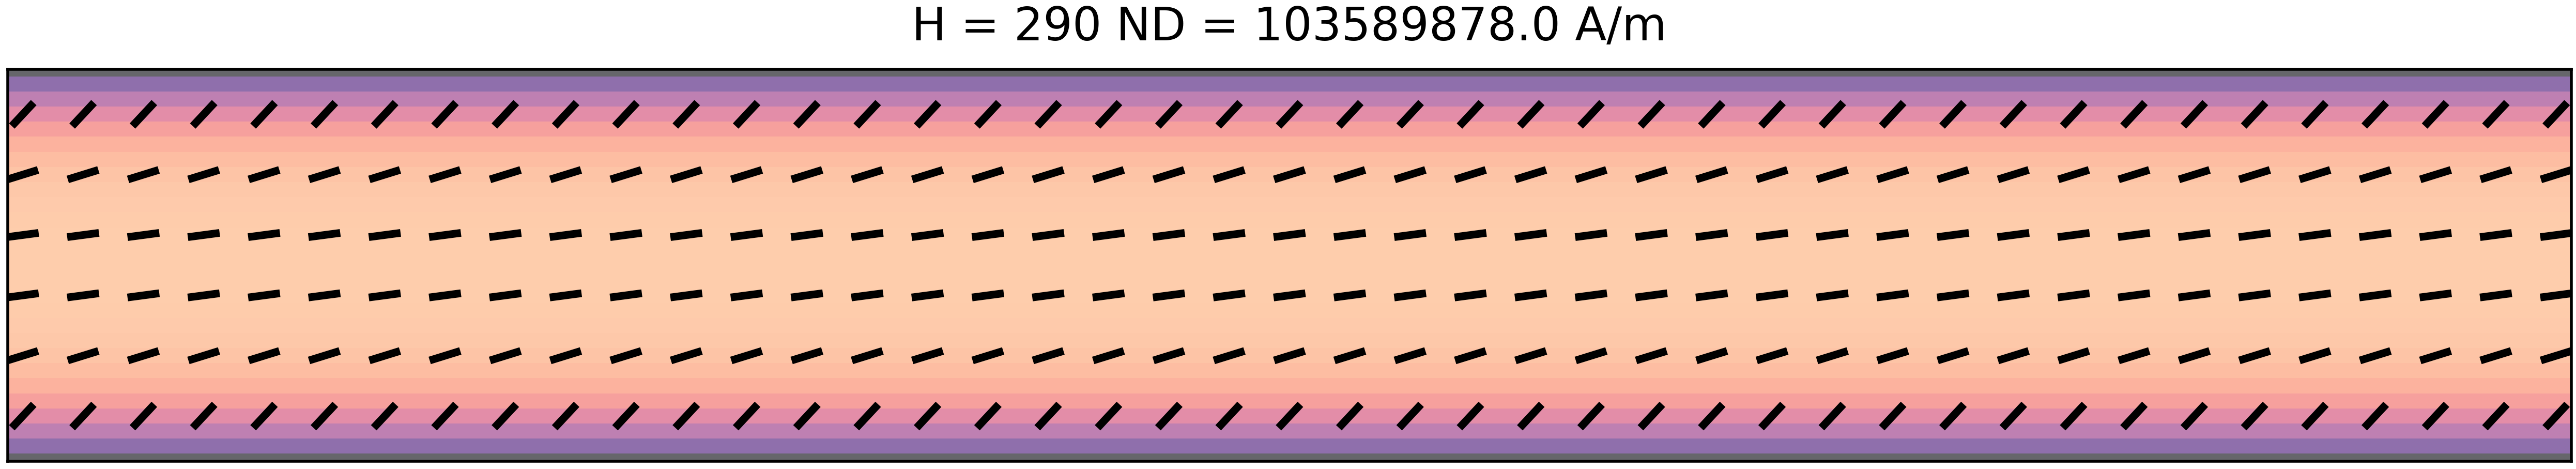

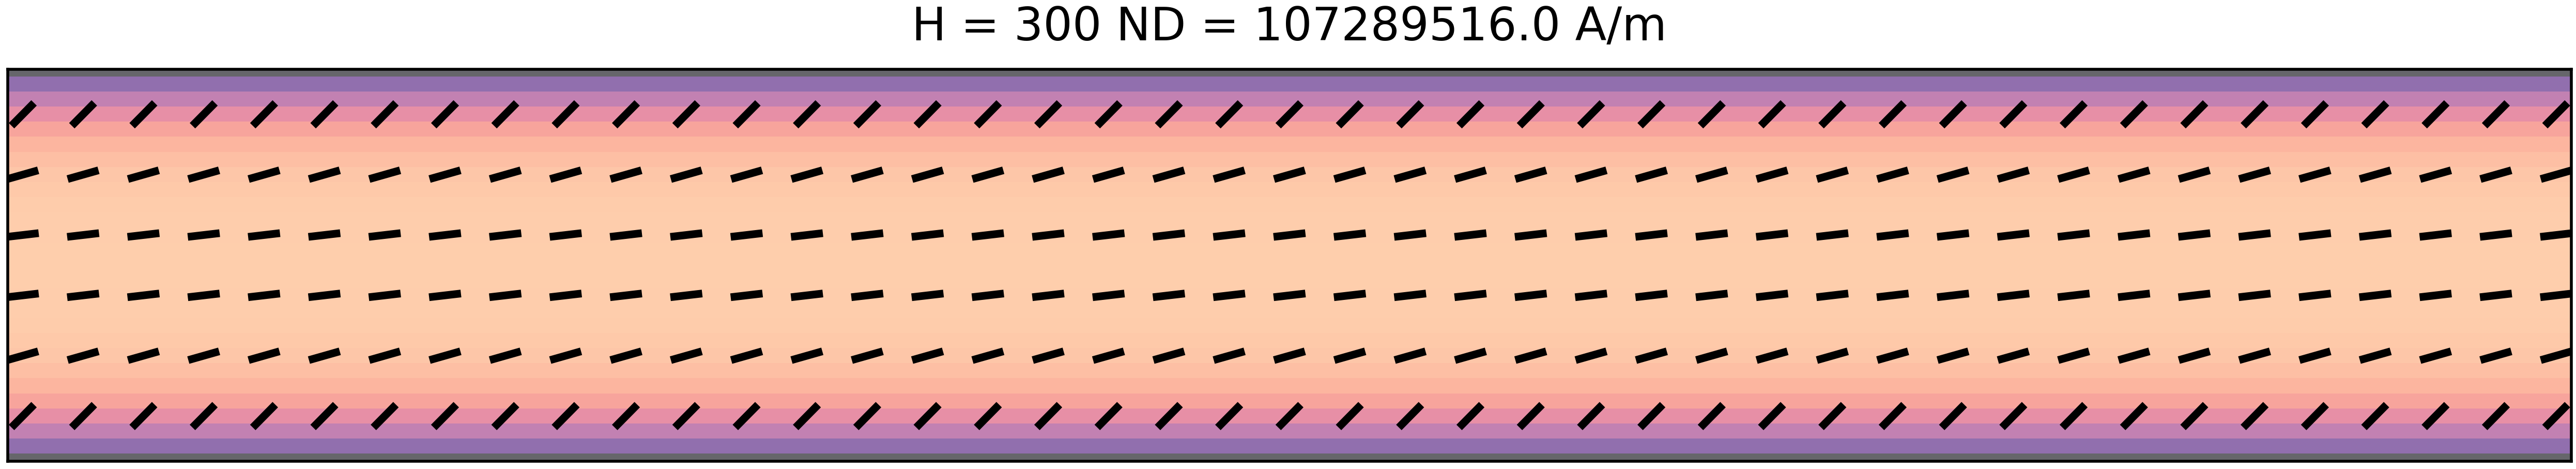

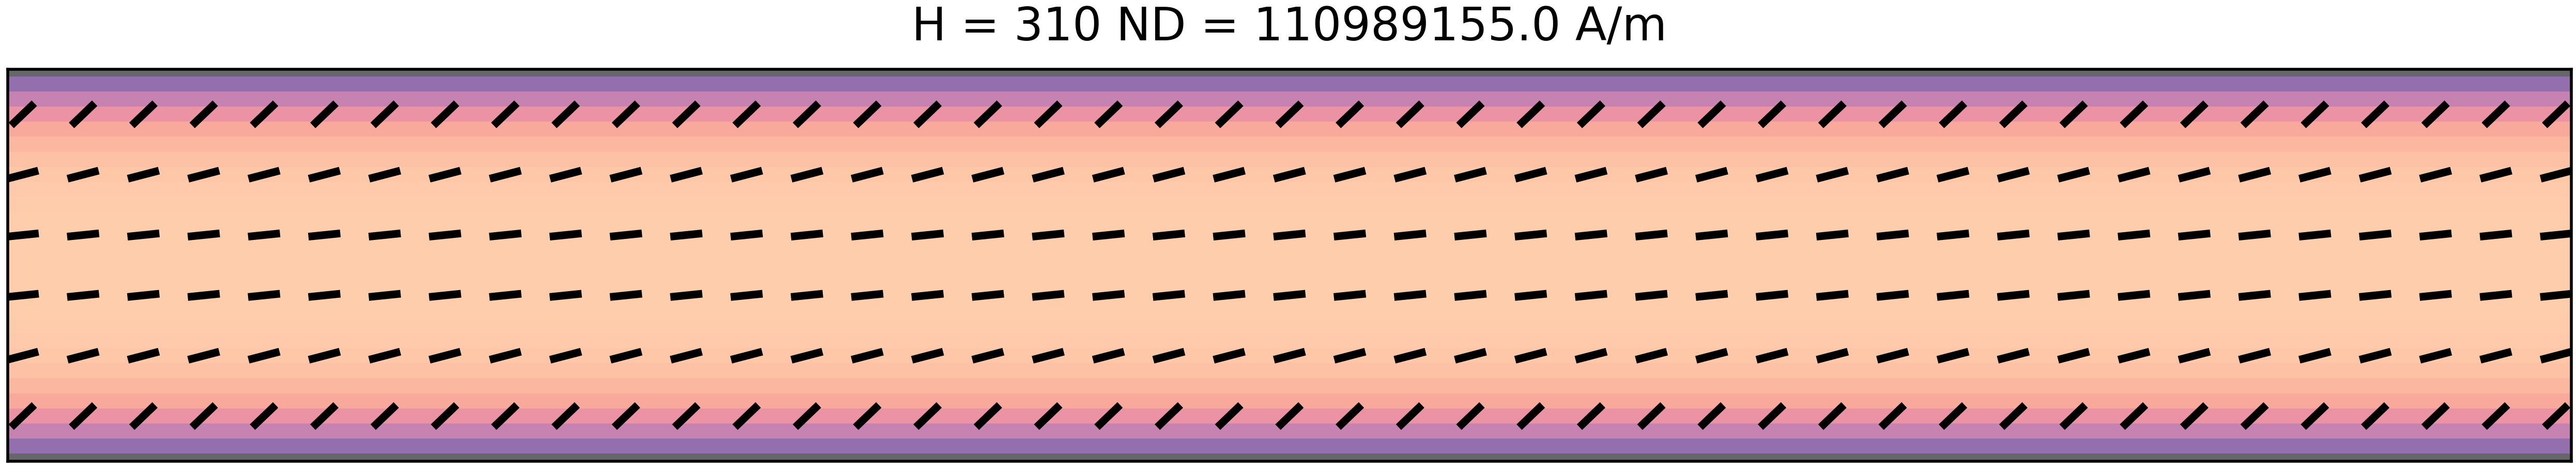

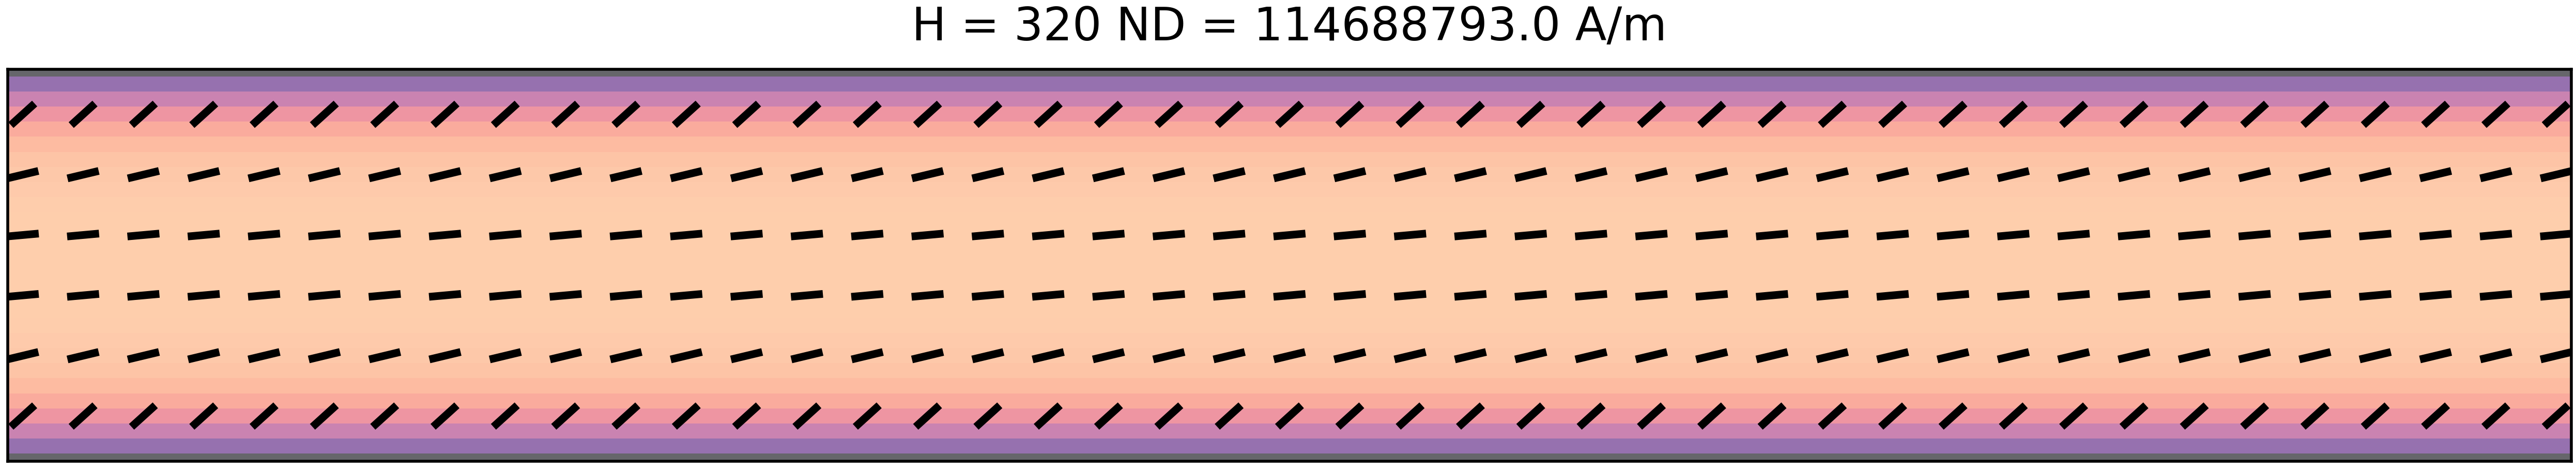

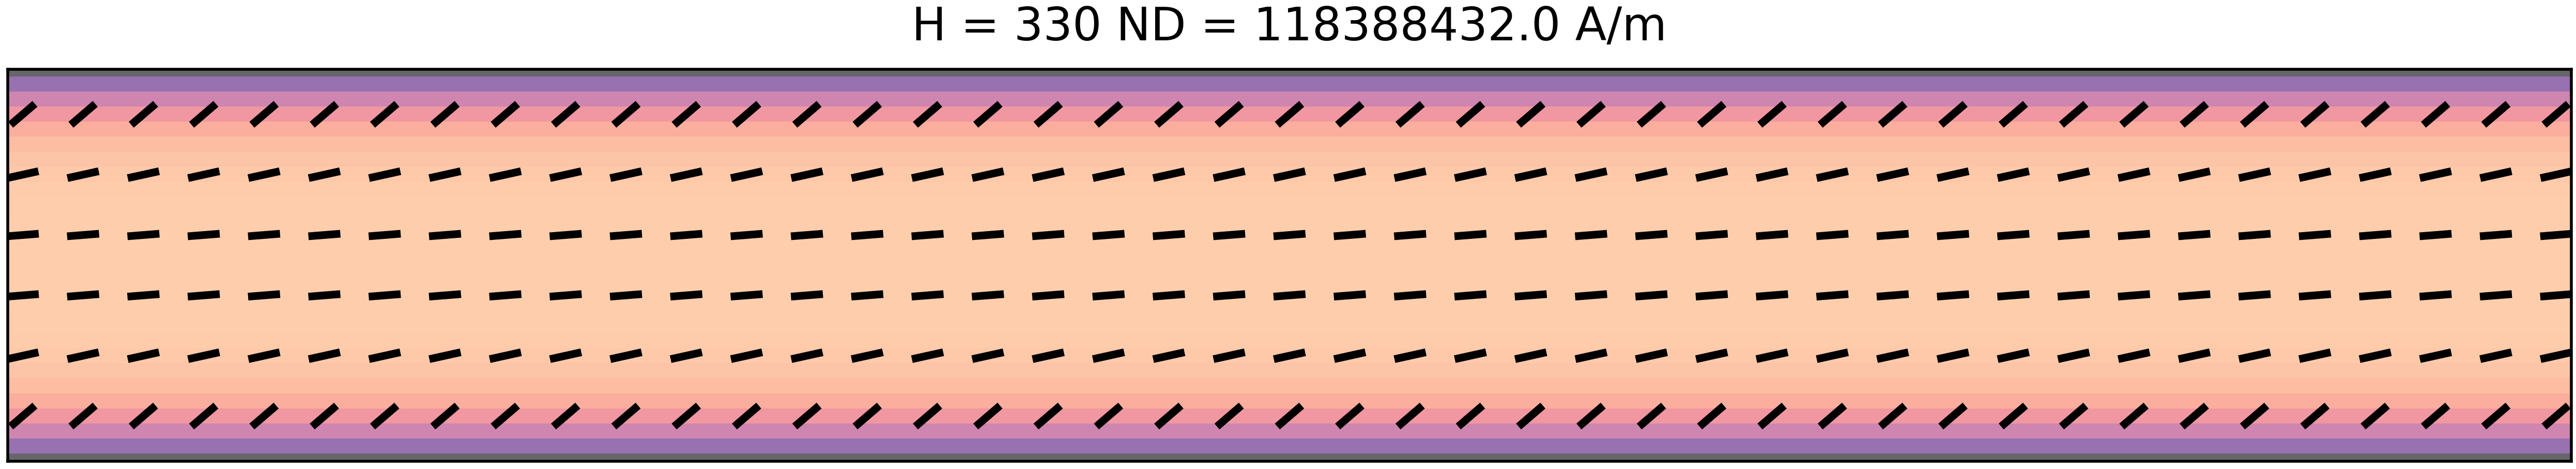

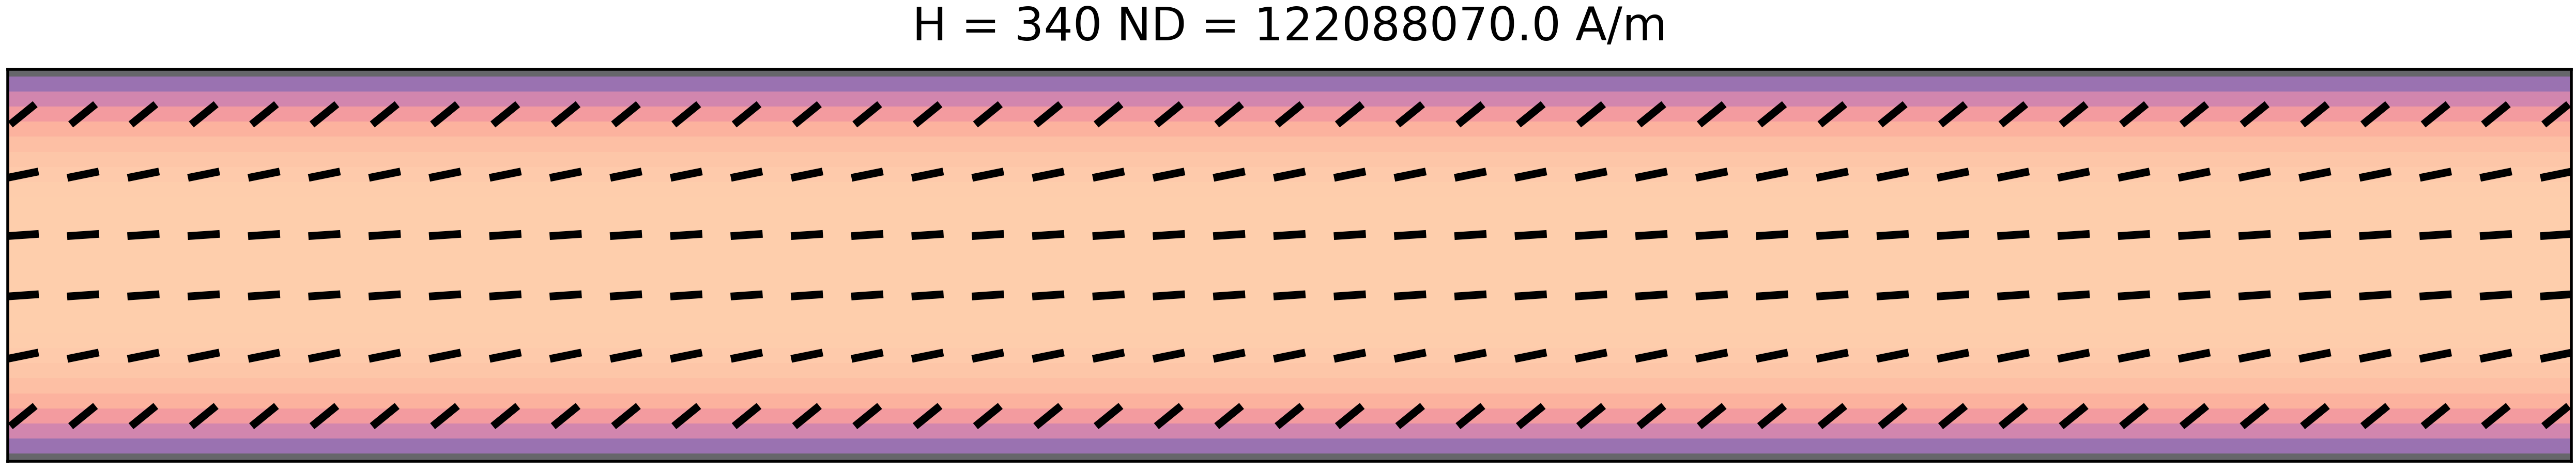

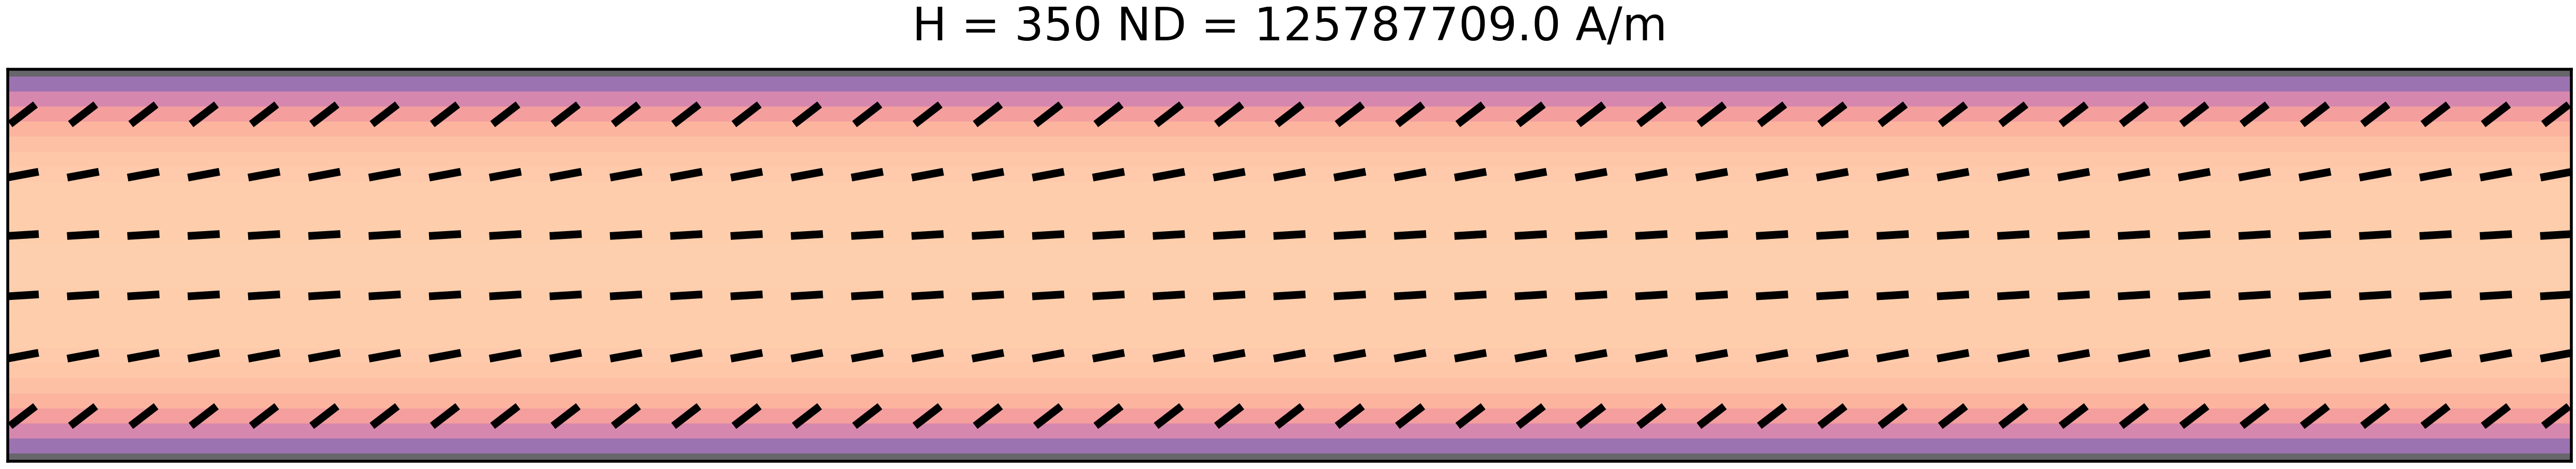

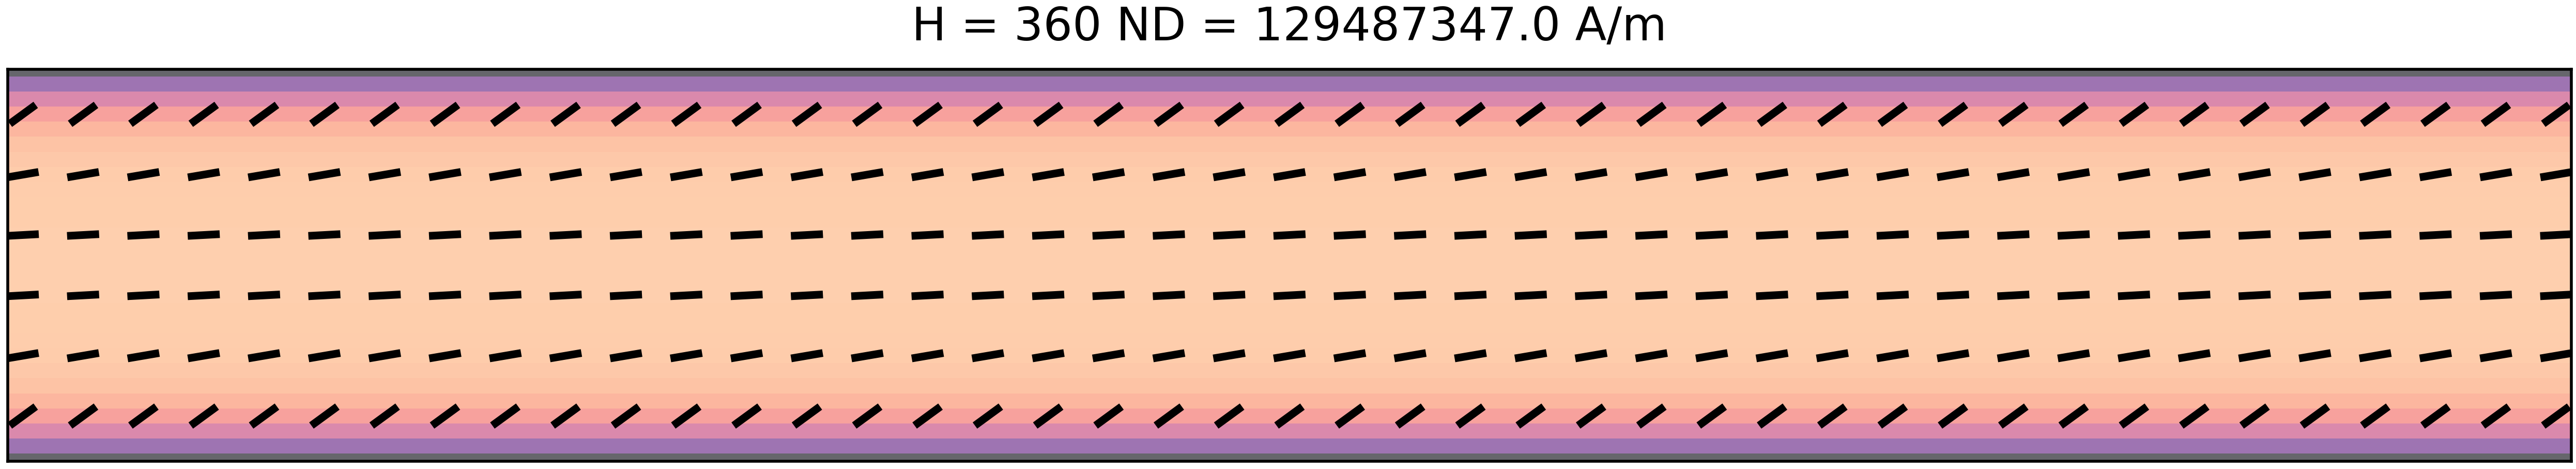

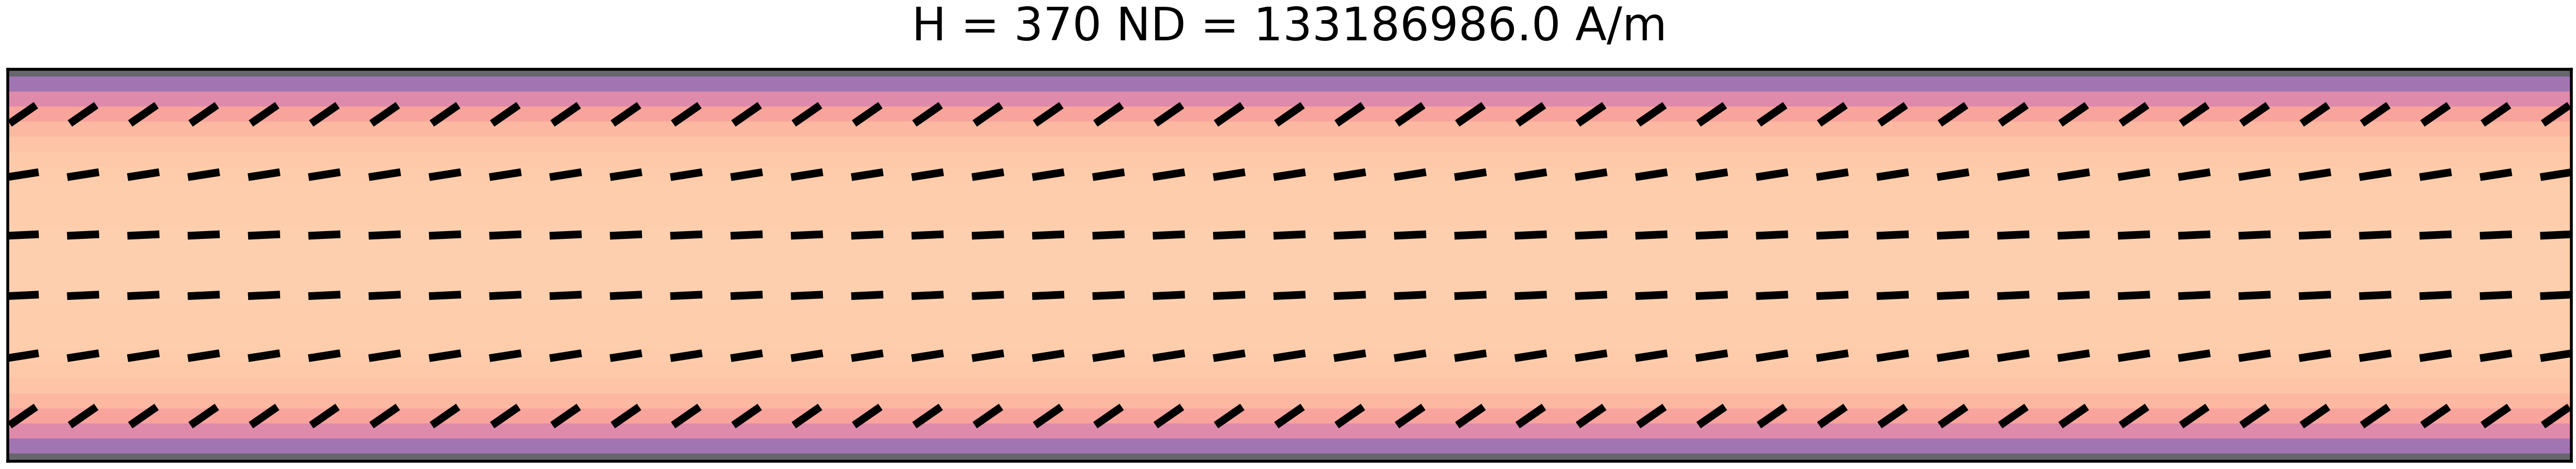

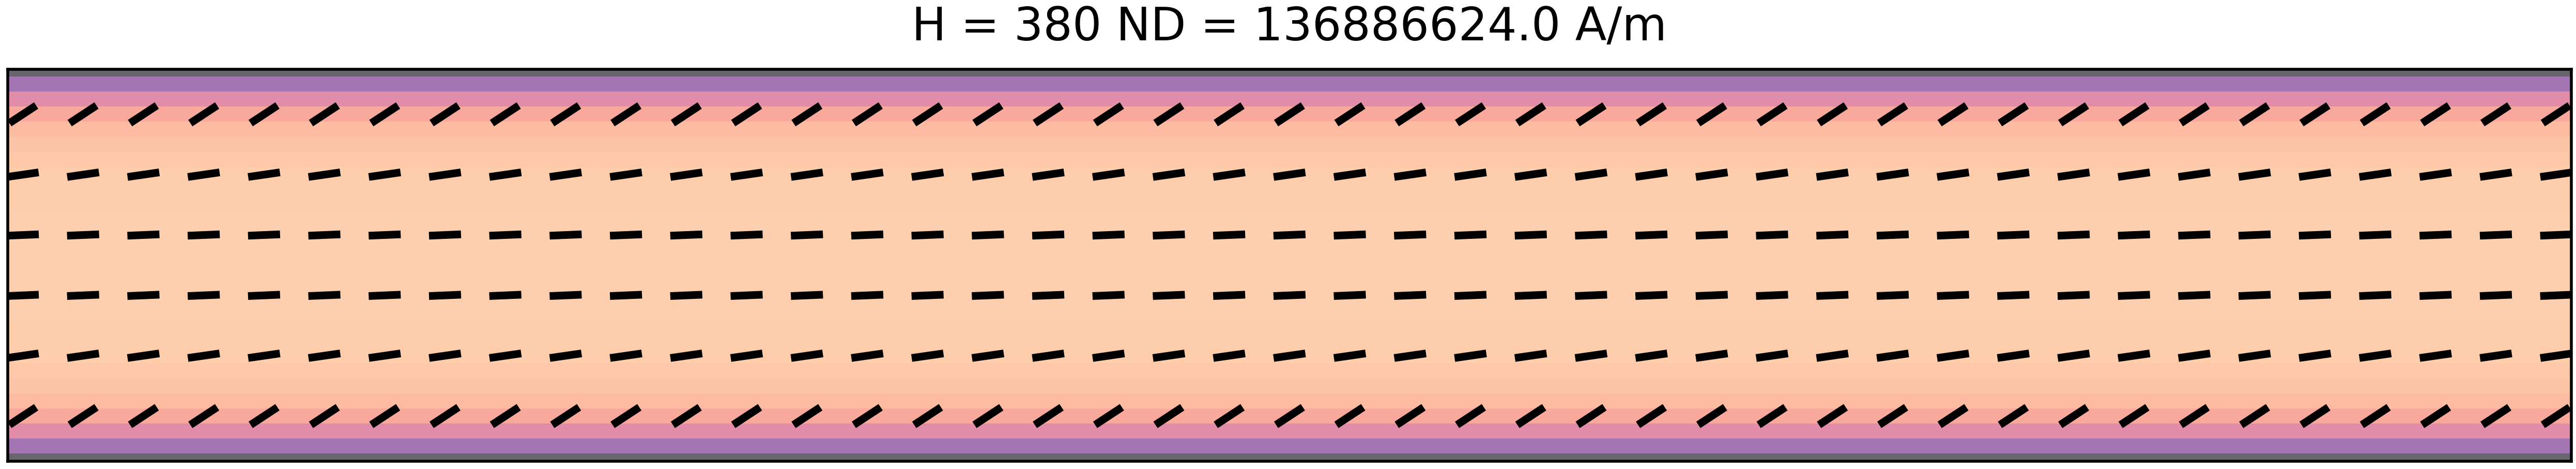

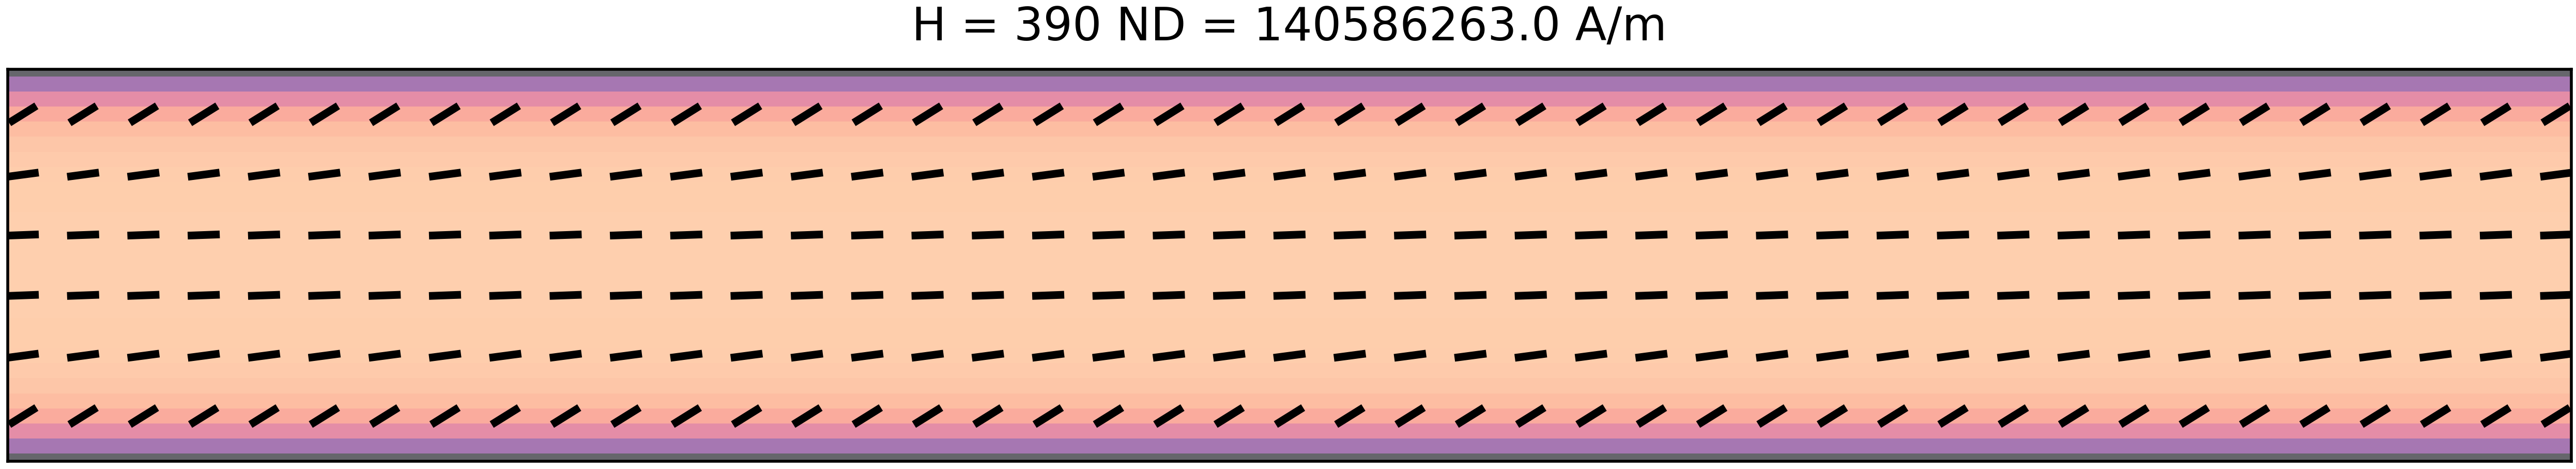

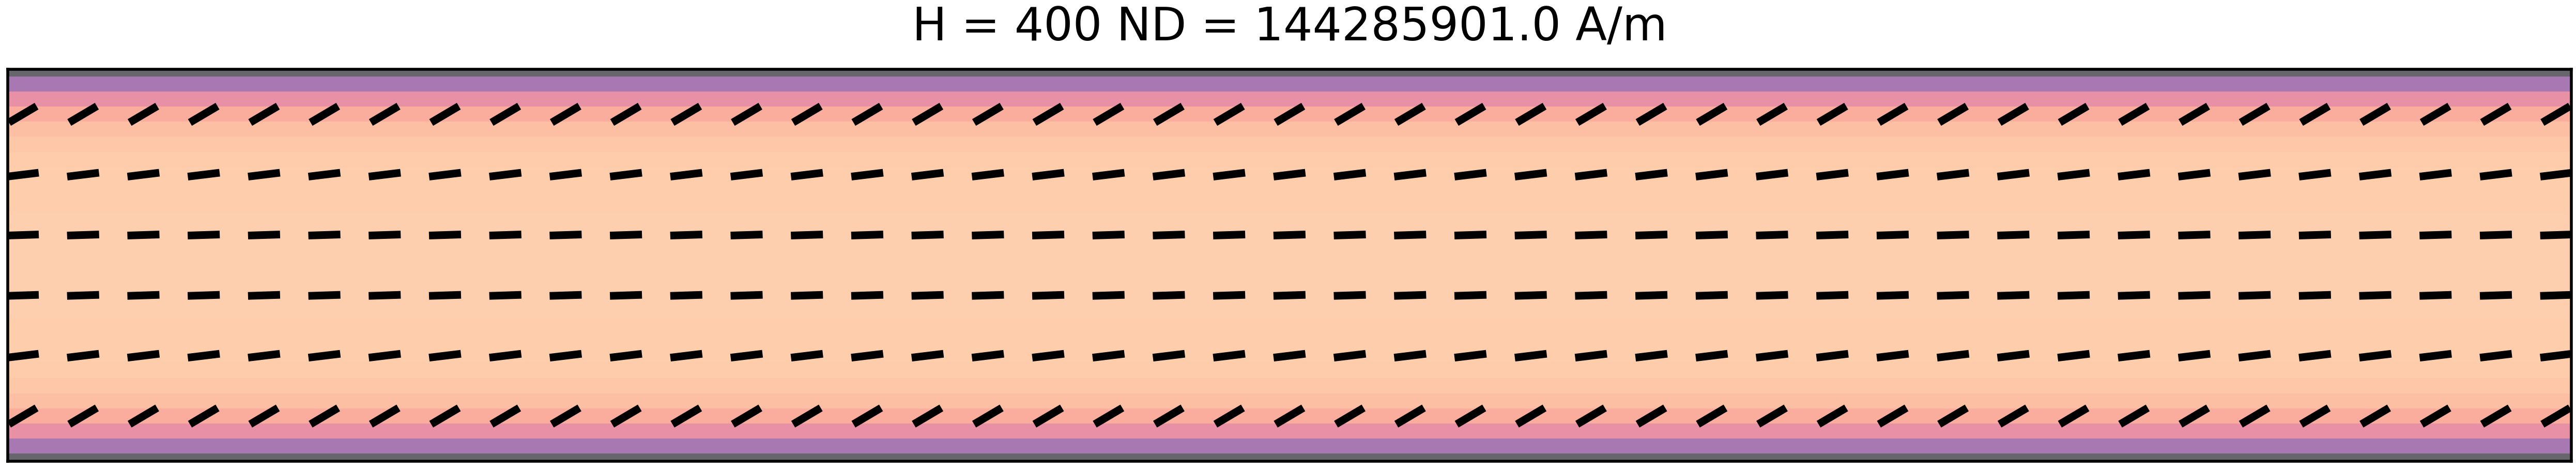

In [20]:
def plot_quiver(H_ny, H_nz, H_c, mid_x, H_title, k_z, scale, width, headaxislength, headwidth):
    plt.figure(figsize=(64,64))
    
    c = 'magma'
    
    plt.imshow(np.abs(H_ny[mid_x,:,:].T), cmap=c, alpha = 0.6)
    plt.clim(0,1.2)
    #cbar = plt.colorbar()

    z_indices, y_indices = np.meshgrid(np.arange(0, H_0_ny.shape[2], k_z), np.arange(0, H_0_ny.shape[1], k_z), indexing='ij')

    y_flat = y_indices.flatten()
    z_flat = z_indices.flatten()
    
    sc = plt.quiver(y_flat, z_flat, H_ny[mid_x, ::k_z, ::k_z].T.flatten(), H_nz[mid_x, ::k_z, ::k_z].T.flatten(), pivot='middle', scale=scale, width=width, headaxislength=headaxislength, headlength=headlength, headwidth=headwidth)

    remove_ticks_and_labels(plt.gca())
    
    n = 4
    for spine in plt.gca().spines.values():
        spine.set_linewidth(n)
        
    plt.title(H_title, fontsize=64, pad=40)

    plt.xlim(35,205)
    plt.ylim(1,27)

# Plot
for H_ny, H_nz, H_c,  H_title in H_list:
    plot_quiver(H_ny, H_nz, H_c, mid_x, H_title, k_z, scale, width, headaxislength, headwidth)

In [23]:
# Interactive plot function
def interactive_quiver(index):
    H_ny, H_nz, H_c, H_title = H_list[index]
    plot_quiver(H_ny, H_nz, H_c, mid_x, H_title, k_z, scale, width, headaxislength, headwidth)

# Create an interactive slider to scroll through the plots
interact(interactive_quiver, index=IntSlider(min=0, max=len(H_list)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=29), Output()), _dom_classes=('widget-intera…

<function __main__.interactive_quiver(index)>